<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Science Final Project Technical Notebook

## _Midwife-Attended Births from 2007-2018 in the United States: Predicting Births, Birth Weights, and Exploring Relationships between Features_

_Author: Cheyanne Baird_

# 1. Problem Statement

According to a recent study, integration of midwives into regional health systems is a key determinant of optimal maternal-newborn outcomes [1]. ProPublica published an article [2] based on this study in 2018, stating that:

- In Sweden, Norway and France, midwives oversee most expectant and new mothers, enabling obstetricians to concentrate on high-risk births. 
- In Canada and New Zealand, midwives are highly valued and brought in to manage complex cases.
- All of those countries have much lower rates of maternal and infant mortality than the United States.
- In the United States, maternal complications have more than doubled in the past 20 years.
- Nearly half of U.S. counties don’t have a single practicing obstetrician-gynecologist, and in rural areas, the number of hospitals offering obstetric services has fallen more than 16 percent since 2004.
- Due partly to opposition from doctors and hospitals, midwives are far less prevalent in the United States than in other affluent countries, attending around 10 percent of births, and the extent to which they can legally participate in patient care varies widely from one state to the next.
- Midwife attendance at births could significantly boost maternal and infant health in the United States.

Sources: 
- [1] https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0192523
- [2] https://www.propublica.org/article/midwives-study-maternal-neonatal-care

Based on the information above, I originally wanted to explore how midwife-attended births could result in improved maternal and infant health, using the features of birth weight and prenatal care. However, I need more data for this, such as data from non-midwife-attended births, infant and maternal mortality rates, and data around birth complications. There are many areas to explore here, including financial and insurance burdens and how this impacts maternal and infant health, birth weights, and prenatal care. Another area that would be interested to look at when data is available for 2020 is if there was a rise in home births due to the Coronavirus pandemic due to frequent ongoing changes in hospital policies, including limits on support people allowed in the delivery room. 

Even though births have decreased since 2007 [3], there was a steady rise in midwife-attended births after a dip in 2011 (see EDA section). Was this due to the recession? 

Sources:
- [3] https://www.nbcnews.com/health/health-news/u-s-births-fall-virus-could-drive-them-down-more-n1210956

Determining if there is an upward trend in midwife-attended births, and if there are trends in certain areas or among certain demographics, may help us understand how to extend midwife assistance and care to expectant mothers across the United States in an effort to promote maternal and infant health. 

Given the data I had, I analyzed data from midwife-attended births in the United States ranging from 2007-2018 per state to predict midwife-attended births and birth weights in 2017-2018 (with a separate training set of 2007-2015). The data has a varied feature set including prenatal care, location of birth, maternal age, education of mother, type of birth, and plurality. I examined if certain factors represented in the feature set correlate with the increase in midwife-attended births. 
 
**Goals and Success Metrics:**

The first goal of this project is to be able to predict midwife-attended births and birth weights. I reduced this task to two states (California and New York), and separated the training set and test set into specific, discrete date ranges. The second goal of this project is to explore relationships in the feature set. 

**Risks and Limitations:**
- There is no data available on the financial status of the mother, which may be useful in understanding the lack of or presence of a midwife at birth.
- There is no data around costs associated with midwife-attended births, which eliminates the evaluation of low-income and/or uninsured mothers. 
- There is no data around the presence of doulas or lactation consultants, which often supplement the presence of a midwife-attended birth. 
- I included both Certified Nurse Midwives (CNMs) and Midwives classified as "other" in this dataset. The difference is not addressed here. CNMs often have more medical training, and certification requiresments are standardized and clear, while those classified as "other" may be certified by an independent, non-standardized institution. 

# 2. Approach Overview

## 2.1 Data Source

The data I obtained was gathered by the CDC and is publically available:
- https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm#Births
- https://wonder.cdc.gov/controller/datarequest/D66;jsessionid=8385053D65E6CDC2037A9DE69F63F16B

## 2.2 Target Variables

- Number of Midwife attended births (both Certified Nurse Midwives, or CNMs, and others who identify as Midwives)
- Birth weights in the United States by state per year (2007 - 2018)

## 2.3 Feature Set (double check this list)

- Year: 
    - 2007 - 2018 range
- Country: 
    - USA
- State: 
    - 50 states, not including US territories
- Prenatal Care: 
    - no prenatal care
    - prenatal care starting in the 1st month
- Age: 
    - average age of mother per state
- Location of Birth: 
    - hospital
    - residence
- Education of Mother: 
    - no diploma
    - doctorate or other professional degree
- Type of Birth:
    - vaginal
    - cesarean
- Plurality:
    - single child
    - twins

## 2.4 Model Approach

I first performed exploratory data analysis (EDA) to explore relationships between features in my dataset. I then came up with a list of questions to explore and which models would be best to use in exploring these questions, deciding whether the problem was a regression or classification problem. I used a variety of models to explore these questions:

- Linear Regression (using r-squared test and train accuracy scores with RSME and Ridge Regression)
- Logistic Regression (using r-squared test accuracy scores with F1 Score and null model score analysis)
- Random Forest Regression (using r-squared test and training accuracy scores with GridSearchCV and feature importances)
- Random Forest Classification (using r-squared test and train accuracy scores with null model score analysis)


# 3. Data Preparation

## 3.1 Importing Libraries and Loading Datasets

In [2609]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2610]:
%matplotlib inline

In [2611]:
midwives_all_locations = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_AllLocations_year_state_std_dev.csv")

In [2612]:
midwives_all_locations_vaginal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_AllLocations_year_state_std_dev_vaginal.csv")

In [2613]:
midwives_all_locations_vaginal["Vaginal Delivery"] = True

In [2614]:
midwives_hosp = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev.csv")

In [2615]:
midwives_hosp["Hospital Birthplace"] = True

In [2616]:
midwives_hosp_1stMoPrenatal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_1stMoPrenatal.csv")

In [2617]:
midwives_hosp_1stMoPrenatal["Hospital Birthplace"] = True
midwives_hosp_1stMoPrenatal["1st Month Prenatal Care"] = True

In [2618]:
midwives_hosp_cesarean = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_cesarean.csv")

In [2619]:
midwives_hosp_cesarean["Hospital Birthplace"] = True
midwives_hosp_cesarean["Cesarean Delivery"] = True

In [2620]:
midwives_hosp_mother_eduNoDiploma = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_eduNoDiploma.csv")

In [2621]:
midwives_hosp_mother_eduNoDiploma["Hospital Birthplace"] = True
midwives_hosp_mother_eduNoDiploma["Mother Education No Diploma"] = True

In [2622]:
midwives_hosp_mother_eduPhD = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_eduPhD.csv")

In [2623]:
midwives_hosp_mother_eduPhD["Hospital Birthplace"] = True
midwives_hosp_mother_eduPhD["Mother Education PhD"] = True

In [2624]:
midwives_hosp_noPrenatal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_noPrenatal.csv")

In [2625]:
midwives_hosp_noPrenatal["Hospital Birthplace"] = True
midwives_hosp_noPrenatal["No Prenatal Care"] = True

In [2626]:
midwives_hosp_vaginal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_vaginal.csv")

In [2627]:
midwives_hosp_vaginal["Hospital Birthplace"] = True
midwives_hosp_vaginal["Vaginal Delivery"] = True

In [2628]:
midwives_resi = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev.csv")

In [2629]:
midwives_resi["Residential Birthplace"] = True

In [2630]:
midwives_resi_1stMoPrenatal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_1stMoPrenatal.csv")

In [2631]:
midwives_resi_1stMoPrenatal["Residential Birthplace"] = True
midwives_resi_1stMoPrenatal["1st Month Prenatal Care"] = True

In [2632]:
midwives_resi_mother_eduNoDiploma = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_EduNoDiploma.csv")

In [2633]:
midwives_resi_mother_eduNoDiploma["Residential Birthplace"] = True
midwives_resi_mother_eduNoDiploma["Mother Education No Diploma"] = True

In [2634]:
midwives_resi_mother_eduPhD = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_eduPhD.csv")

In [2635]:
midwives_resi_mother_eduPhD["Residential Birthplace"] = True
midwives_resi_mother_eduPhD["Mother Education PhD"] = True

In [2636]:
midwives_resi_noPrenatal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_noPrenatal.csv")

In [2637]:
midwives_resi_noPrenatal["Residential Birthplace"] = True
midwives_resi_noPrenatal["No Prenatal Care"] = True

In [2638]:
midwives_resi_twins = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_twins.csv")

In [2639]:
midwives_resi_twins["Residential Birthplace"] = True
midwives_resi_twins["Twins"] = True

In [2640]:
midwives_resi_vaginal = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_residence_year_state_std_dev_vaginal.csv")

In [2641]:
midwives_resi_vaginal["Residential Birthplace"] = True
midwives_resi_vaginal["Vaginal Delivery"] = True

In [2642]:
midwives_all_locations_cesarean = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_AllLocations_year_state_std_dev_cesarean.csv")

In [2643]:
midwives_all_locations_cesarean["Cesarean Delivery"] = True

In [2644]:
midwives_hosp_twins = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwife_hosp_year_state_std_dev_twins.csv")

In [2645]:
midwives_hosp_twins["Hospital Birthplace"] = True
midwives_hosp_twins["Twins"] = True

## 3.2 Combining Datasets

In [2646]:
# combine datasets
midwives_merged = pd.concat([
    midwives_all_locations_vaginal, 
    midwives_hosp_1stMoPrenatal, 
    midwives_hosp_cesarean, 
    midwives_hosp_mother_eduNoDiploma, 
    midwives_hosp_mother_eduPhD, 
    midwives_hosp_noPrenatal, 
    midwives_hosp_vaginal, 
    midwives_resi_1stMoPrenatal, 
    midwives_resi_mother_eduNoDiploma, 
    midwives_resi_mother_eduPhD, 
    midwives_resi_noPrenatal, 
    midwives_resi_twins, 
    midwives_resi_vaginal, 
    midwives_all_locations_cesarean, 
    midwives_hosp_twins,
    midwives_hosp,
    midwives_resi,
], sort="True")
midwives_merged.head()

,% of Total Births,1st Month Prenatal Care,Average Age of Mother,Average Birth Weight,Average LMP Gestational Age,Average OE Gestational Age,Births,Cesarean Delivery,Hospital Birthplace,Mother Education No Diploma,...,Standard Deviation for Average Age of Mother,Standard Deviation for Average Birth Weight,Standard Deviation for Average LMP Gestational Age,Standard Deviation for Average OE Gestational Age,State,State Code,Twins,Vaginal Delivery,Year,Year Code
0,0.03%,NaN,23.78,3242.89,38.74,38.66,1251,NaN,NaN,NaN,...,5.17,514.02,2.61,1.57,Alabama,1.0,NaN,True,2007.0,2007.0
1,0.06%,NaN,26.32,3541.28,39.26,39.14,2485,NaN,NaN,NaN,...,5.77,494.08,1.73,1.42,Alaska,2.0,NaN,True,2007.0,2007.0
2,0.14%,NaN,25.89,3395.58,39.18,39.15,5902,NaN,NaN,NaN,...,6.07,470.27,2.12,1.49,Arizona,4.0,NaN,True,2007.0,2007.0
3,0.01%,NaN,26.38,3401.59,39.20,39.20,381,NaN,NaN,NaN,...,5.88,505.84,2.19,1.31,Arkansas,5.0,NaN,True,2007.0,2007.0
4,1.04%,NaN,27.64,3414.63,39.23,39.12,43539,NaN,NaN,NaN,...,6.02,463.14,1.78,1.41,California,6.0,NaN,True,2007.0,2007.0


## 3.3 Handling Missing Data

In [2647]:
# fill in missing data
midwives_merged.loc[:, [
    "Hospital Birthplace", 
    "Residential Birthplace", 
    "Vaginal Delivery", 
    "Cesarean Delivery", 
    "No Prenatal Care", 
    "1st Month Prenatal Care", 
    "Mother Education No Diploma", 
    "Mother Education PhD", 
    "Twins",
]] = midwives_merged.loc[:, [
    "Hospital Birthplace", 
    "Residential Birthplace", 
    "Vaginal Delivery", 
    "Cesarean Delivery", 
    "No Prenatal Care", 
    "1st Month Prenatal Care", 
    "Mother Education No Diploma", 
    "Mother Education PhD", 
    "Twins",
]].fillna(False)
midwives_merged.head()

,% of Total Births,1st Month Prenatal Care,Average Age of Mother,Average Birth Weight,Average LMP Gestational Age,Average OE Gestational Age,Births,Cesarean Delivery,Hospital Birthplace,Mother Education No Diploma,...,Standard Deviation for Average Age of Mother,Standard Deviation for Average Birth Weight,Standard Deviation for Average LMP Gestational Age,Standard Deviation for Average OE Gestational Age,State,State Code,Twins,Vaginal Delivery,Year,Year Code
0,0.03%,False,23.78,3242.89,38.74,38.66,1251,False,False,False,...,5.17,514.02,2.61,1.57,Alabama,1.0,False,True,2007.0,2007.0
1,0.06%,False,26.32,3541.28,39.26,39.14,2485,False,False,False,...,5.77,494.08,1.73,1.42,Alaska,2.0,False,True,2007.0,2007.0
2,0.14%,False,25.89,3395.58,39.18,39.15,5902,False,False,False,...,6.07,470.27,2.12,1.49,Arizona,4.0,False,True,2007.0,2007.0
3,0.01%,False,26.38,3401.59,39.20,39.20,381,False,False,False,...,5.88,505.84,2.19,1.31,Arkansas,5.0,False,True,2007.0,2007.0
4,1.04%,False,27.64,3414.63,39.23,39.12,43539,False,False,False,...,6.02,463.14,1.78,1.41,California,6.0,False,True,2007.0,2007.0


In [2648]:
midwives_merged.drop(midwives_merged.loc[midwives_merged["Year"]==False].index, inplace=True)

In [2649]:
midwives_merged.dtypes

% of Total Births                                      object
1st Month Prenatal Care                                  bool
Average Age of Mother                                 float64
Average Birth Weight                                  float64
Average LMP Gestational Age                           float64
Average OE Gestational Age                            float64
Births                                                  int64
Cesarean Delivery                                        bool
Hospital Birthplace                                      bool
Mother Education No Diploma                              bool
Mother Education PhD                                     bool
No Prenatal Care                                         bool
Notes                                                  object
Residential Birthplace                                   bool
Standard Deviation for Average Age of Mother          float64
Standard Deviation for Average Birth Weight           float64
Standard

## 3.4 Reordering Columns

In [2650]:
# reorder columns
column_names = [
    "Notes", 
    "Year", 
    "Year Code", 
    "State", 
    "State Code", 
    "Births", 
    "% of Total Births", 
    "Average Birth Weight", 
    "Standard Deviation for Average Birth Weight", 
    "Average Age of Mother", 
    "Standard Deviation for Average Age of Mother", 
    "Average LMP Gestational Age", 
    "Standard Deviation for Average LMP Gestational Age", 
    "Average OE Gestational Age", 
    "Standard Deviation for Gestational Age", 
    "Hospital Birthplace", 
    "Residential Birthplace", 
    "Vaginal Delivery", 
    "Cesarean Delivery", 
    "No Prenatal Care", 
    "1st Month Prenatal Care", 
    "Mother Education No Diploma", 
    "Mother Education PhD", 
    "Twins",
]

midwives_merged = midwives_merged.reindex(columns=column_names)
midwives_merged.head()

,Notes,Year,Year Code,State,State Code,Births,% of Total Births,Average Birth Weight,Standard Deviation for Average Birth Weight,Average Age of Mother,...,Standard Deviation for Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,NaN,2007.0,2007.0,Alabama,1.0,1251,0.03%,3242.89,514.02,23.78,...,NaN,False,False,True,False,False,False,False,False,False
1,NaN,2007.0,2007.0,Alaska,2.0,2485,0.06%,3541.28,494.08,26.32,...,NaN,False,False,True,False,False,False,False,False,False
2,NaN,2007.0,2007.0,Arizona,4.0,5902,0.14%,3395.58,470.27,25.89,...,NaN,False,False,True,False,False,False,False,False,False
3,NaN,2007.0,2007.0,Arkansas,5.0,381,0.01%,3401.59,505.84,26.38,...,NaN,False,False,True,False,False,False,False,False,False
4,NaN,2007.0,2007.0,California,6.0,43539,1.04%,3414.63,463.14,27.64,...,NaN,False,False,True,False,False,False,False,False,False


## 3.5 Dropping Columns

In [2651]:
# drop columns
midwives_merged.drop("Notes", axis=1, inplace=True)
midwives_merged.drop("Year Code", axis=1, inplace=True)
midwives_merged.drop("Standard Deviation for Average Birth Weight", axis=1, inplace=True)
midwives_merged.drop("Standard Deviation for Average Age of Mother", axis=1, inplace=True)
midwives_merged.drop("Standard Deviation for Gestational Age", axis=1, inplace=True)
midwives_merged.drop("Standard Deviation for Average LMP Gestational Age", axis=1, inplace=True)
midwives_merged.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007.0,Alabama,1.0,1251,0.03%,3242.89,23.78,38.74,38.66,False,False,True,False,False,False,False,False,False
1,2007.0,Alaska,2.0,2485,0.06%,3541.28,26.32,39.26,39.14,False,False,True,False,False,False,False,False,False
2,2007.0,Arizona,4.0,5902,0.14%,3395.58,25.89,39.18,39.15,False,False,True,False,False,False,False,False,False
3,2007.0,Arkansas,5.0,381,0.01%,3401.59,26.38,39.20,39.20,False,False,True,False,False,False,False,False,False
4,2007.0,California,6.0,43539,1.04%,3414.63,27.64,39.23,39.12,False,False,True,False,False,False,False,False,False


## 3.6 Evaluating Dataset Statistics and Info

In [2652]:
# dataset shape
midwives_merged.shape

(6843, 18)

In [2653]:
# dataset summary statistics
midwives_merged.describe

<bound method NDFrame.describe of        Year          State  State Code  Births % of Total Births  \
0    2007.0        Alabama         1.0    1251             0.03%   
1    2007.0         Alaska         2.0    2485             0.06%   
2    2007.0        Arizona         4.0    5902             0.14%   
3    2007.0       Arkansas         5.0     381             0.01%   
4    2007.0     California         6.0   43539             1.04%   
..      ...            ...         ...     ...               ...   
587  2018.0       Virginia        51.0     774             0.29%   
588  2018.0     Washington        53.0    1636             0.60%   
589  2018.0  West Virginia        54.0      27             0.01%   
590  2018.0      Wisconsin        55.0    1356             0.50%   
591  2018.0        Wyoming        56.0      98             0.04%   

     Average Birth Weight  Average Age of Mother  Average LMP Gestational Age  \
0                 3242.89                  23.78                    

In [2654]:
# dataset info
midwives_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6843 entries, 0 to 591
Data columns (total 18 columns):
Year                           6829 non-null float64
State                          6661 non-null object
State Code                     6661 non-null float64
Births                         6843 non-null int64
% of Total Births              6843 non-null object
Average Birth Weight           6843 non-null float64
Average Age of Mother          6843 non-null float64
Average LMP Gestational Age    6843 non-null float64
Average OE Gestational Age     6843 non-null float64
Hospital Birthplace            6843 non-null bool
Residential Birthplace         6843 non-null bool
Vaginal Delivery               6843 non-null bool
Cesarean Delivery              6843 non-null bool
No Prenatal Care               6843 non-null bool
1st Month Prenatal Care        6843 non-null bool
Mother Education No Diploma    6843 non-null bool
Mother Education PhD           6843 non-null bool
Twins                

In [2655]:
# dtypes
midwives_merged.dtypes

Year                           float64
State                           object
State Code                     float64
Births                           int64
% of Total Births               object
Average Birth Weight           float64
Average Age of Mother          float64
Average LMP Gestational Age    float64
Average OE Gestational Age     float64
Hospital Birthplace               bool
Residential Birthplace            bool
Vaginal Delivery                  bool
Cesarean Delivery                 bool
No Prenatal Care                  bool
1st Month Prenatal Care           bool
Mother Education No Diploma       bool
Mother Education PhD              bool
Twins                             bool
dtype: object

## 3.7 Cleaning Up Datatypes

In [2656]:
# remove percentage sign
midwives_merged["% of Total Births"] = midwives_merged["% of Total Births"].str.replace("%", "").astype(float)
midwives_merged.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007.0,Alabama,1.0,1251,0.03,3242.89,23.78,38.74,38.66,False,False,True,False,False,False,False,False,False
1,2007.0,Alaska,2.0,2485,0.06,3541.28,26.32,39.26,39.14,False,False,True,False,False,False,False,False,False
2,2007.0,Arizona,4.0,5902,0.14,3395.58,25.89,39.18,39.15,False,False,True,False,False,False,False,False,False
3,2007.0,Arkansas,5.0,381,0.01,3401.59,26.38,39.20,39.20,False,False,True,False,False,False,False,False,False
4,2007.0,California,6.0,43539,1.04,3414.63,27.64,39.23,39.12,False,False,True,False,False,False,False,False,False


In [2657]:
# running dtypes again
midwives_merged.dtypes

Year                           float64
State                           object
State Code                     float64
Births                           int64
% of Total Births              float64
Average Birth Weight           float64
Average Age of Mother          float64
Average LMP Gestational Age    float64
Average OE Gestational Age     float64
Hospital Birthplace               bool
Residential Birthplace            bool
Vaginal Delivery                  bool
Cesarean Delivery                 bool
No Prenatal Care                  bool
1st Month Prenatal Care           bool
Mother Education No Diploma       bool
Mother Education PhD              bool
Twins                             bool
dtype: object

In [2658]:
# changing column dtypes for State Code
midwives_merged["State Code"] = midwives_merged["State Code"].astype(object)
midwives_merged.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007.0,Alabama,1,1251,0.03,3242.89,23.78,38.74,38.66,False,False,True,False,False,False,False,False,False
1,2007.0,Alaska,2,2485,0.06,3541.28,26.32,39.26,39.14,False,False,True,False,False,False,False,False,False
2,2007.0,Arizona,4,5902,0.14,3395.58,25.89,39.18,39.15,False,False,True,False,False,False,False,False,False
3,2007.0,Arkansas,5,381,0.01,3401.59,26.38,39.20,39.20,False,False,True,False,False,False,False,False,False
4,2007.0,California,6,43539,1.04,3414.63,27.64,39.23,39.12,False,False,True,False,False,False,False,False,False


In [2659]:
# running dtypes again
midwives_merged.dtypes

Year                           float64
State                           object
State Code                      object
Births                           int64
% of Total Births              float64
Average Birth Weight           float64
Average Age of Mother          float64
Average LMP Gestational Age    float64
Average OE Gestational Age     float64
Hospital Birthplace               bool
Residential Birthplace            bool
Vaginal Delivery                  bool
Cesarean Delivery                 bool
No Prenatal Care                  bool
1st Month Prenatal Care           bool
Mother Education No Diploma       bool
Mother Education PhD              bool
Twins                             bool
dtype: object

In [2660]:
# looking at first few rows
midwives_merged.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007.0,Alabama,1,1251,0.03,3242.89,23.78,38.74,38.66,False,False,True,False,False,False,False,False,False
1,2007.0,Alaska,2,2485,0.06,3541.28,26.32,39.26,39.14,False,False,True,False,False,False,False,False,False
2,2007.0,Arizona,4,5902,0.14,3395.58,25.89,39.18,39.15,False,False,True,False,False,False,False,False,False
3,2007.0,Arkansas,5,381,0.01,3401.59,26.38,39.20,39.20,False,False,True,False,False,False,False,False,False
4,2007.0,California,6,43539,1.04,3414.63,27.64,39.23,39.12,False,False,True,False,False,False,False,False,False


## 3.8 Creating Time Shifted Datasets for Age

In [2661]:
midwives_age_time_shifted = pd.DataFrame({"Year": list(range(2007, 2016)) + list(range(2007, 2016)), "State": ["California"] * 9 + ["New York"] * 9, "Average Age of Mother": np.random.normal(size=18) + 50})
midwives_age_time_shifted.head(25)

,Year,State,Average Age of Mother
0,2007,California,49.093009
1,2008,California,50.810949
2,2009,California,51.462784
3,2010,California,47.752029
4,2011,California,48.045272
5,2012,California,49.209782
6,2013,California,49.936219
7,2014,California,50.846097
8,2015,California,49.044391
9,2007,New York,50.397516


In [2662]:
midwives_age_time_shifted.to_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwives_age_time_shifted.csv")

In [2663]:
midwives_shifted_dfs = []
for state, state_df in midwives_age_time_shifted.groupby("State"):
    state_df.loc[:, "Average Age of Mother"] = state_df.loc[:, "Average Age of Mother"].shift(1)
    midwives_shifted_dfs.append(state_df)
pd.concat(midwives_shifted_dfs)

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Year,State,Average Age of Mother
0,2007,California,NaN
1,2008,California,49.093009
2,2009,California,50.810949
3,2010,California,51.462784
4,2011,California,47.752029
5,2012,California,48.045272
6,2013,California,49.209782
7,2014,California,49.936219
8,2015,California,50.846097
9,2007,New York,NaN


## 3.9 Creating Additional Datasets for Date Ranges and States

In [2664]:
# 2007 - 2015 training set all data
midwives_merged_training = midwives_merged.loc[midwives_merged.loc[:, "Year"] < 2016.0, :]
midwives_merged_training.tail()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
438,2015.0,Virginia,51,715,0.26,3638.40,31.11,39.91,39.80,False,True,False,False,False,False,False,False,False
439,2015.0,Washington,53,1741,0.64,3651.66,30.80,39.82,39.74,False,True,False,False,False,False,False,False,False
440,2015.0,West Virginia,54,44,0.02,3502.66,30.55,39.73,39.73,False,True,False,False,False,False,False,False,False
441,2015.0,Wisconsin,55,1359,0.50,3619.38,29.95,39.97,39.81,False,True,False,False,False,False,False,False,False
442,2015.0,Wyoming,56,104,0.04,3507.75,29.31,39.80,39.86,False,True,False,False,False,False,False,False,False


In [2665]:
# 2017 - 2018 testing set all data
midwives_merged_testing = midwives_merged.loc[midwives_merged.loc[:, "Year"] >= 2017.0, :]
midwives_merged_testing.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
520,2017.0,Alabama,1,542,0.01,3359.35,27.59,39.19,38.94,False,False,True,False,False,False,False,False,False
521,2017.0,Alaska,2,3544,0.08,3490.94,27.76,39.12,39.01,False,False,True,False,False,False,False,False,False
522,2017.0,Arizona,4,6704,0.16,3411.90,27.69,39.30,39.11,False,False,True,False,False,False,False,False,False
523,2017.0,Arkansas,5,347,0.01,3573.07,28.72,39.68,39.52,False,False,True,False,False,False,False,False,False
524,2017.0,California,6,52189,1.24,3398.64,29.80,39.27,39.13,False,False,True,False,False,False,False,False,False


In [2666]:
# 2007 - 2015 training data california only
midwives_merged_training_california = midwives_merged_training.loc[(midwives_merged_training.loc[:, "State"] == "California")]
midwives_merged_training_california.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
4,2007.0,California,6,43539,1.04,3414.63,27.64,39.23,39.12,False,False,True,False,False,False,False,False,False
56,2008.0,California,6,43181,1.03,3417.00,27.68,39.26,39.14,False,False,True,False,False,False,False,False,False
108,2009.0,California,6,43333,1.03,3416.64,27.95,39.29,39.16,False,False,True,False,False,False,False,False,False
160,2010.0,California,6,44280,1.05,3410.19,28.15,39.28,39.16,False,False,True,False,False,False,False,False,False
212,2011.0,California,6,43333,1.03,3411.12,28.42,39.31,39.18,False,False,True,False,False,False,False,False,False


In [2667]:
midwives_merged_training_california.to_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwives_merged_training_california.csv")

In [2668]:
midwives_merged_training_california_ts = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwives_merged_training_california_ts.csv")

In [2669]:
midwives_merged_training_california_ts.drop("Unnamed: 0", axis=1, inplace=True)

In [2670]:
midwives_merged_training_california_ts.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007,California,6,43539,1.04,3414.63,50.646190,39.23,39.12,False,False,True,False,False,False,False,False,False
1,2008,California,6,43181,1.03,3417.00,47.832552,39.26,39.14,False,False,True,False,False,False,False,False,False
2,2009,California,6,43333,1.03,3416.64,49.239159,39.29,39.16,False,False,True,False,False,False,False,False,False
3,2010,California,6,44280,1.05,3410.19,49.734601,39.28,39.16,False,False,True,False,False,False,False,False,False
4,2011,California,6,43333,1.03,3411.12,52.037109,39.31,39.18,False,False,True,False,False,False,False,False,False


In [2671]:
# 2017 - 2018 testing data california only
midwives_merged_testing_california = midwives_merged_testing.loc[(midwives_merged_testing.loc[:, "State"] == "California")]
midwives_merged_testing_california.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
524,2017.0,California,6,52189,1.24,3398.64,29.80,39.27,39.13,False,False,True,False,False,False,False,False,False
576,2018.0,California,6,53374,1.27,3400.02,30.01,39.27,39.14,False,False,True,False,False,False,False,False,False
362,2017.0,California,6,2599,1.98,3372.38,28.98,39.19,38.73,True,False,False,False,False,True,False,False,False
411,2018.0,California,6,2411,1.84,3375.08,29.15,39.30,38.79,True,False,False,False,False,True,False,False,False
441,2017.0,California,6,234,0.45,3322.29,30.53,38.88,38.71,True,False,False,True,False,False,False,False,False


In [2672]:
# 2007 - 2015 training data new york only
midwives_merged_training_newyork = midwives_merged_training.loc[(midwives_merged_training.loc[:, "State"] == "New York")]
midwives_merged_training_newyork.tail()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
226,2011.0,New York,36,1166,0.43,3554.25,31.59,39.80,39.62,False,True,False,False,False,False,False,False,False
275,2012.0,New York,36,1264,0.47,3556.39,31.43,39.84,39.62,False,True,False,False,False,False,False,False,False
325,2013.0,New York,36,1274,0.47,3530.57,31.48,39.97,39.77,False,True,False,False,False,False,False,False,False
374,2014.0,New York,36,1302,0.48,3534.68,31.78,39.84,39.72,False,True,False,False,False,False,False,False,False
424,2015.0,New York,36,1248,0.46,3545.85,31.69,39.86,39.74,False,True,False,False,False,False,False,False,False


In [2673]:
midwives_merged_training_newyork.to_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwives_merged_training_newyork.csv")

In [2674]:
midwives_merged_training_newyork_ts = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/midwives_merged_training_newyork_ts.csv")

In [2675]:
midwives_merged_training_newyork_ts.drop("Unnamed: 0", axis=1, inplace=True)

In [2676]:
midwives_merged_training_newyork_ts.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
0,2007,New York,36,25412,0.60,3366.95,49.590065,39.26,39.16,False,False,True,False,False,False,False,False,False
1,2008,New York,36,24840,0.59,3353.71,49.658510,39.22,39.10,False,False,True,False,False,False,False,False,False
2,2009,New York,36,24782,0.59,3361.49,50.442306,39.23,39.15,False,False,True,False,False,False,False,False,False
3,2010,New York,36,24649,0.59,3360.68,49.566127,39.25,39.15,False,False,True,False,False,False,False,False,False
4,2011,New York,36,24195,0.58,3357.00,50.908420,39.30,39.17,False,False,True,False,False,False,False,False,False


In [2677]:
# 2017 - 2018 testing data new york only
midwives_merged_testing_newyork = midwives_merged_testing.loc[(midwives_merged_testing.loc[:, "State"] == "New York")]
midwives_merged_testing_newyork.head()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
552,2017.0,New York,36,23624,0.56,3365.47,28.74,39.32,39.14,False,False,True,False,False,False,False,False,False
604,2018.0,New York,36,22570,0.54,3369.36,28.90,39.31,39.16,False,False,True,False,False,False,False,False,False
390,2017.0,New York,36,671,0.51,3302.65,28.61,39.51,38.62,True,False,False,False,False,True,False,False,False
439,2018.0,New York,36,560,0.43,3331.45,28.88,39.46,38.71,True,False,False,False,False,True,False,False,False
464,2017.0,New York,36,71,0.14,3357.55,31.45,39.15,38.85,True,False,False,True,False,False,False,False,False


In [2678]:
# 2007 - 2018 california only
midwives_merged_california = midwives_merged.loc[(midwives_merged.loc[:, "State"] == "California")]
midwives_merged_california.tail()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
348,2014.0,California,6,2610,0.96,3589.61,31.91,39.86,39.72,False,True,False,False,False,False,False,False,False
397,2015.0,California,6,2693,0.99,3582.20,31.97,39.84,39.73,False,True,False,False,False,False,False,False,False
447,2016.0,California,6,2489,0.92,3560.67,32.29,39.84,39.71,False,True,False,False,False,False,False,False,False
496,2017.0,California,6,2468,0.91,3575.82,32.43,39.82,39.76,False,True,False,False,False,False,False,False,False
546,2018.0,California,6,2308,0.85,3585.80,32.58,39.82,39.72,False,True,False,False,False,False,False,False,False


In [2679]:
# 2007 - 2018 new york only 
midwives_merged_newyork = midwives_merged.loc[(midwives_merged.loc[:, "State"] == "New York")]
midwives_merged_newyork.tail()

,Year,State,State Code,Births,% of Total Births,Average Birth Weight,Average Age of Mother,Average LMP Gestational Age,Average OE Gestational Age,Hospital Birthplace,Residential Birthplace,Vaginal Delivery,Cesarean Delivery,No Prenatal Care,1st Month Prenatal Care,Mother Education No Diploma,Mother Education PhD,Twins
374,2014.0,New York,36,1302,0.48,3534.68,31.78,39.84,39.72,False,True,False,False,False,False,False,False,False
424,2015.0,New York,36,1248,0.46,3545.85,31.69,39.86,39.74,False,True,False,False,False,False,False,False,False
473,2016.0,New York,36,1243,0.46,3576.47,32.01,39.89,39.74,False,True,False,False,False,False,False,False,False
523,2017.0,New York,36,1223,0.45,3570.36,32.08,39.88,39.77,False,True,False,False,False,False,False,False,False
573,2018.0,New York,36,1283,0.47,3554.53,32.46,39.89,39.81,False,True,False,False,False,False,False,False,False


# 4. Exploratory Data Analysis: Exploring the Midwives Dataset

In [2972]:
all_births_cdc = pd.read_csv("/Users/cheyanne/Desktop/GARepo/final_project/all_births_07_18.csv")

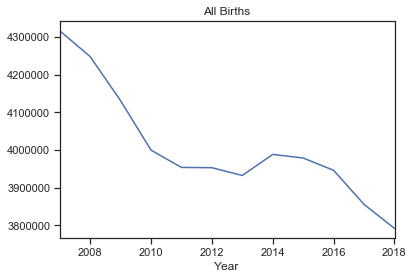

In [2974]:
all_births_cdc.groupby("Year")["Births"].sum().plot().set_title("All Births");

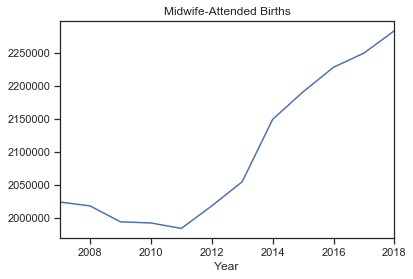

In [2975]:
midwives_merged.groupby("Year")["Births"].sum().plot().set_title("Midwife-Attended Births");

**Observations**
- All births in the United States have been decreasing since 2007. Due to recession? 
- However, there is a steady rise in midwife-attended births after a dip in 2011. 
- Future Work: what is this dip in 2011 and steady rise attributed to? I do not currently have a dataset of non-midwife-attended births to compare this to, so no observations regarding non-midwife-attended births vs. midwife-attended births. Obtain data with non-midwife-attended births. Do a regional analysis or state-by-state.

## 4.1 Histogram Analysis

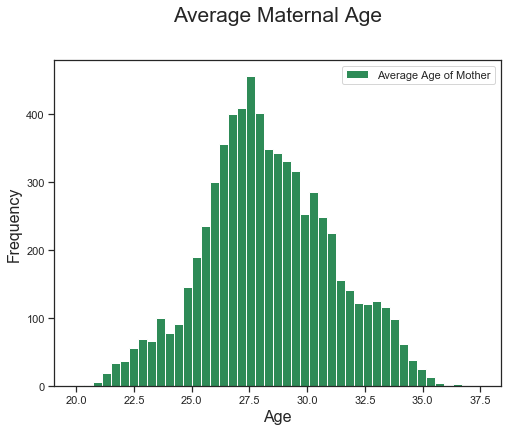

In [2898]:
ax = midwives_merged.loc[:, "Average Age of Mother"].plot.hist(bins=45, color="seagreen", figsize=(8, 6))
ax.set_title("Average Maternal Age", fontsize=21, y=1.1)
ax.legend(loc="upper right");
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("Age", fontsize=16);

In [2899]:
average_maternal_age_mean = midwives_merged.loc[:, "Average Age of Mother"].mean()
average_maternal_age_mean

28.305371912903727

In [2900]:
average_birth_weight_mean = midwives_merged.loc[:, "Average Birth Weight"].mean()
average_birth_weight_mean

3368.3504574017356

**Observations**
- Average maternal age is 28
- Average birth weight is 3368 grams

## 4.2 Scatterplot Analysis

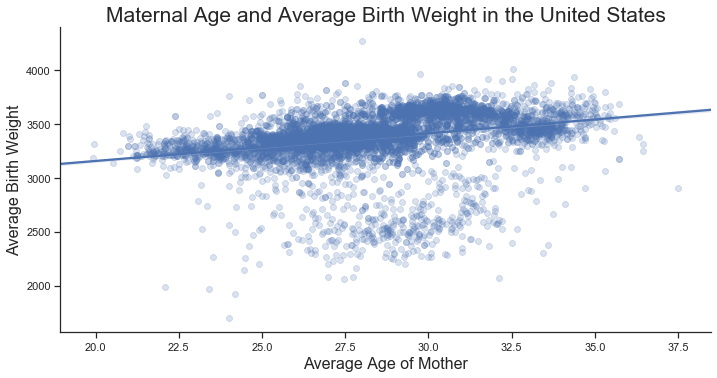

In [2901]:
import seaborn as sns
g = sns.lmplot(
    x="Average Age of Mother",
    y="Average Birth Weight",
    data=midwives_merged,
    aspect=2.0,
    scatter_kws={"alpha": 0.2},
)

g.ax.set_title("Maternal Age and Average Birth Weight in the United States", fontsize=21, y=1.1)
g.ax.set_xlabel("Average Age of Mother", fontsize=16)
g.ax.set_ylabel("Average Birth Weight", fontsize=16);

**Observations**
- The plot above explores relationships between features (Average Birth Weight and Average Age of Mother). 
- This scatter plot shows that there are two populations and a correlation between the two. 
- Future work: look at trends within each population. Fit with Linear Regression. Target is Average Birth Weight (numeric). Analyze relationship between maternal age and top healthy baby weight, and low baby weight. Pick arbitrary cutoff? 

## 4.3 Jointplot Analysis

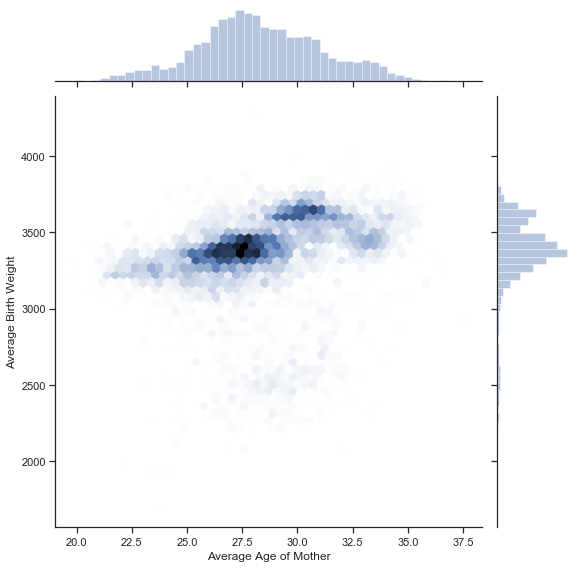

In [2902]:
g = sns.jointplot("Average Age of Mother", "Average Birth Weight", data=midwives_merged, kind="hex", height=8)

**Observations**
- Same representation as the scatter plot above. 
- Higher weight babies appear to be born to older mothers. 

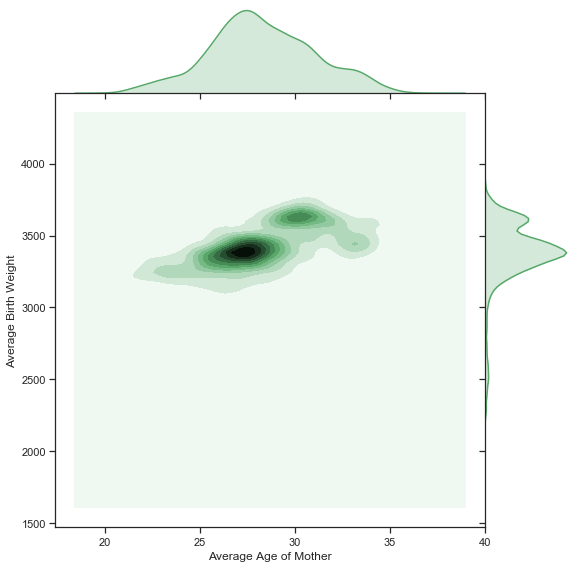

In [2903]:
g = sns.jointplot("Average Age of Mother", "Average Birth Weight", data=midwives_merged,
                  kind="kde", space=0, color="g", height=8)

**Observations**
- Same information as the scatter plot and joint plot above, different visual representation. 

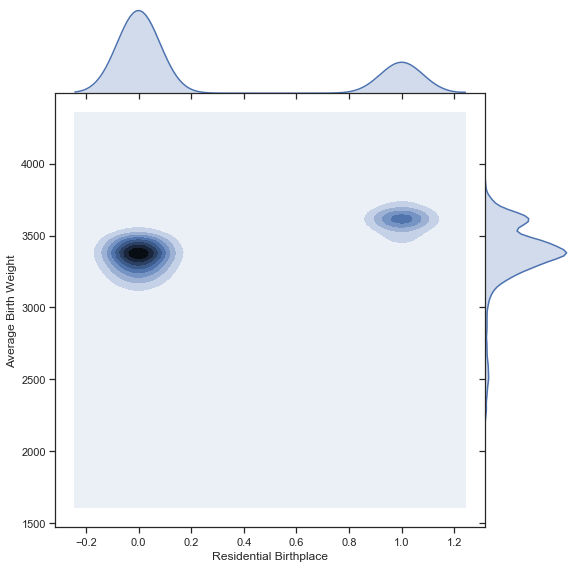

In [2904]:
g = sns.jointplot("Residential Birthplace", "Average Birth Weight", data=midwives_merged,
                  kind="kde", space=0, color="b", height=8) 

**Observations**
- Residential birthplace correlated with slightly higher birth weights. 

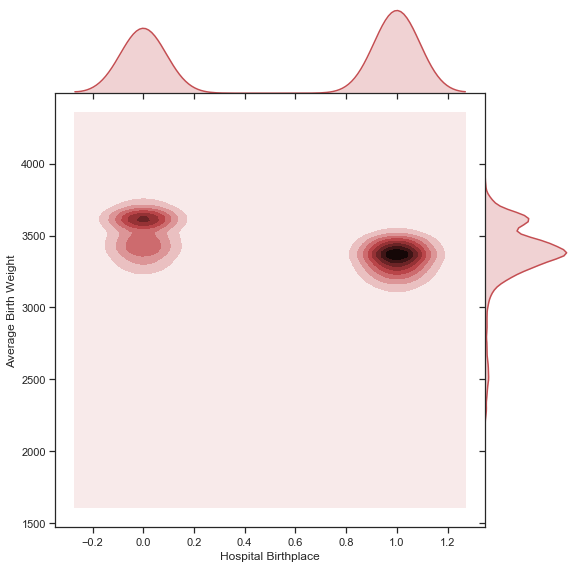

In [2905]:
g = sns.jointplot("Hospital Birthplace", "Average Birth Weight", data=midwives_merged,
                  kind="kde", space=0, color="r", height=8)

**Observations**
- Hospital birthplace also correlated with slightly higher birth weights. 

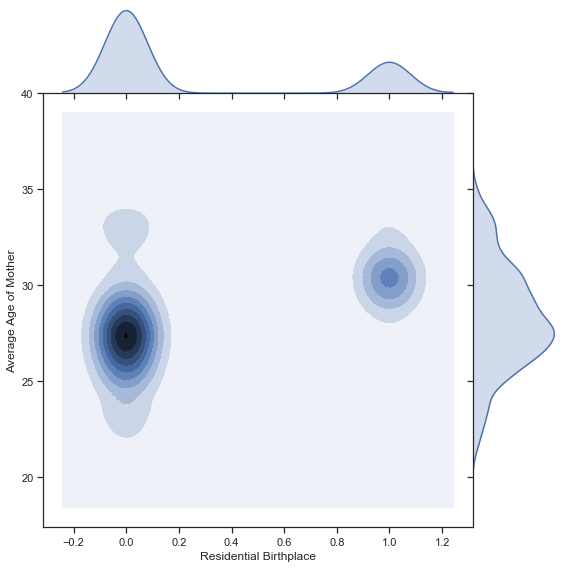

In [2906]:
g = sns.jointplot("Residential Birthplace", "Average Age of Mother", data=midwives_merged,
                  kind="kde", space=0, color="b", height=8)

**Observations**
- Average age of mother older for residential birthplace.

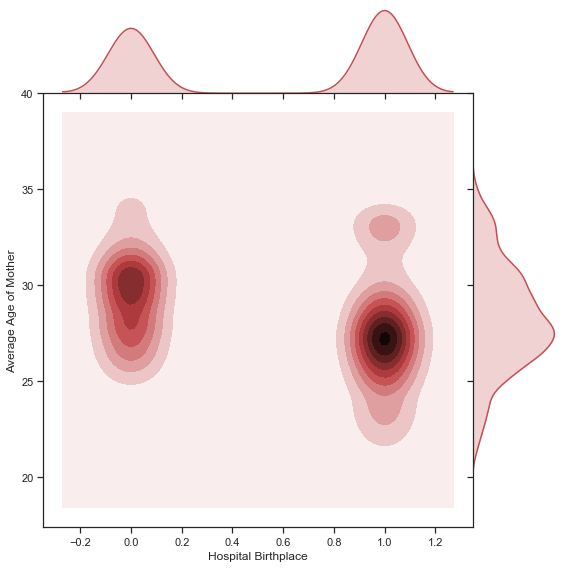

In [2907]:
g = sns.jointplot("Hospital Birthplace", "Average Age of Mother", data=midwives_merged,
                  kind="kde", space=0, color="r", height=8)

**Observations**
- For hospital birthplace, mean is lower than residential for maternal age.
- Run logistic regression to find out.
- Not a big difference between relationship between maternal age and residential vs. hospital birthplace. 

## 4.4 Pairplot Analysis

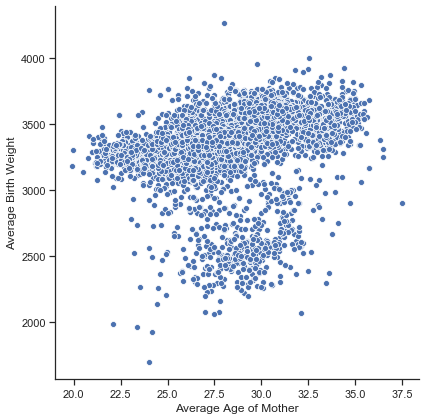

In [2908]:
g = sns.pairplot(midwives_merged, height=6, 
                 x_vars=["Average Age of Mother"],
                 y_vars=["Average Birth Weight"])

**Observations**
- Different visualization of scatter plot and jointplot: two populations for maternal age and birth weight. 

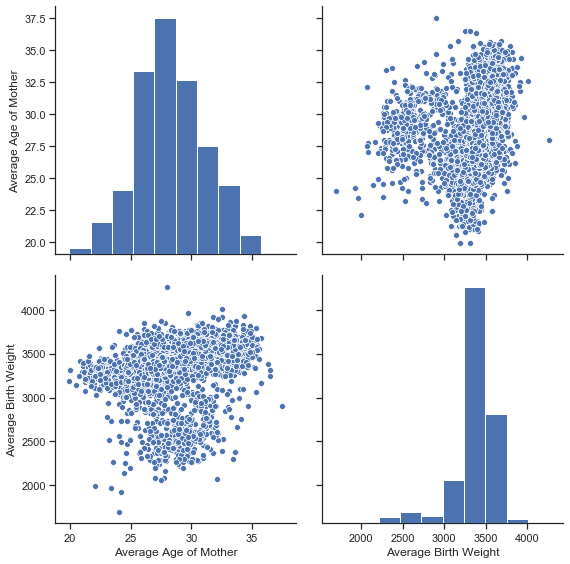

In [2909]:
g = sns.pairplot(midwives_merged, height=4,
                 vars=["Average Age of Mother", "Average Birth Weight"])

**Observations**
- Different visualization of scatter plot and jointplot: two populations for maternal age and birth weight. 

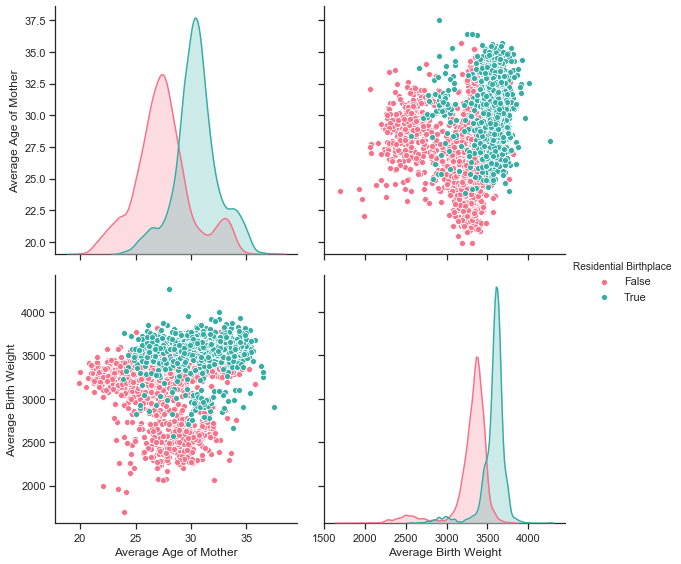

In [2910]:
g = sns.pairplot(midwives_merged, vars=["Average Age of Mother", "Average Birth Weight"], hue="Residential Birthplace", palette="husl", height=4)

**Observations:**
- Higher birth weight for residential birthplace.

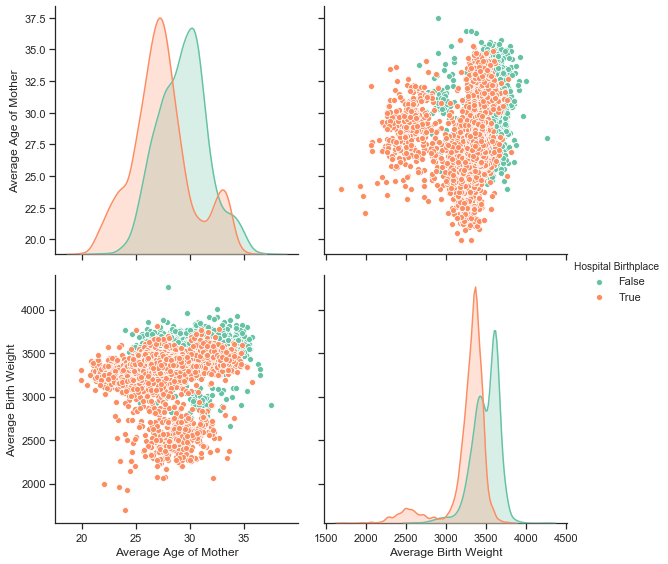

In [2911]:
g = sns.pairplot(midwives_merged, vars=["Average Age of Mother", "Average Birth Weight"], hue="Hospital Birthplace", palette="Set2", height=4)

**Observations:**
- Higher birth weight shown again in non-hospital births.

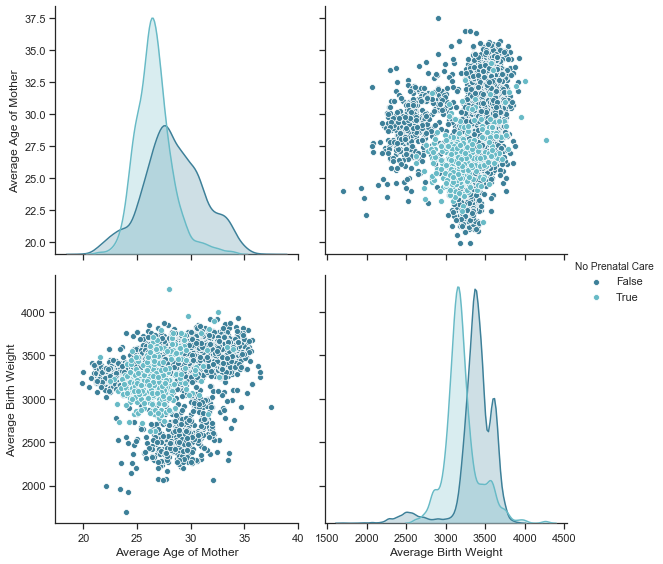

In [2912]:
g = sns.pairplot(midwives_merged, vars=["Average Age of Mother", "Average Birth Weight"], hue="No Prenatal Care", palette="GnBu_d", height=4)

**Observations:**
- Not much of a correlation between birth weight and lack of prenatal care shown here. 

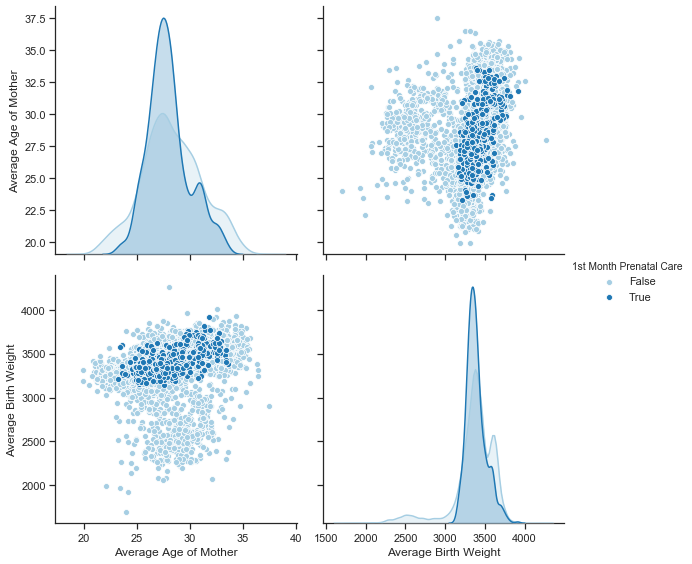

In [2913]:
g = sns.pairplot(midwives_merged, vars=["Average Age of Mother", "Average Birth Weight"], hue="1st Month Prenatal Care", palette="Paired", height=4)

**Observations:**
- Higher birth weight with early prenatal care.

## 4.5 Countplot Analysis

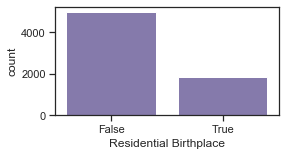

In [2914]:
ax = sns.countplot(x="Residential Birthplace", data=midwives_merged, color="m", order=midwives_merged["Residential Birthplace"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

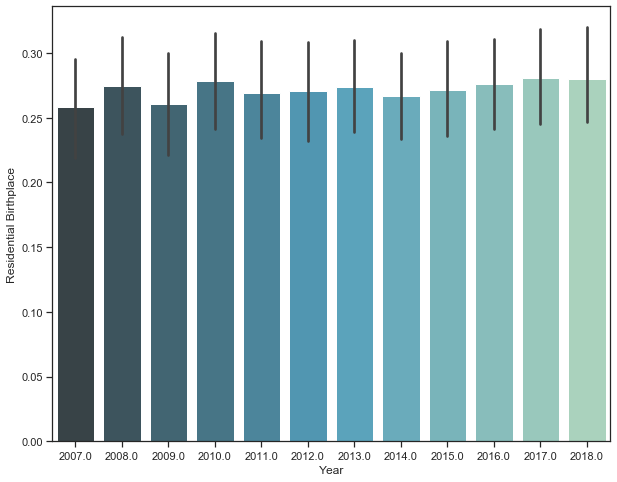

In [2915]:
ax = sns.barplot("Year", y="Residential Birthplace", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

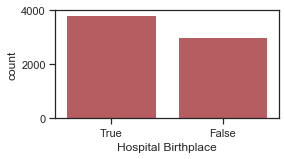

In [2916]:
ax = sns.countplot(x="Hospital Birthplace", data=midwives_merged, color="r", order=midwives_merged["Hospital Birthplace"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

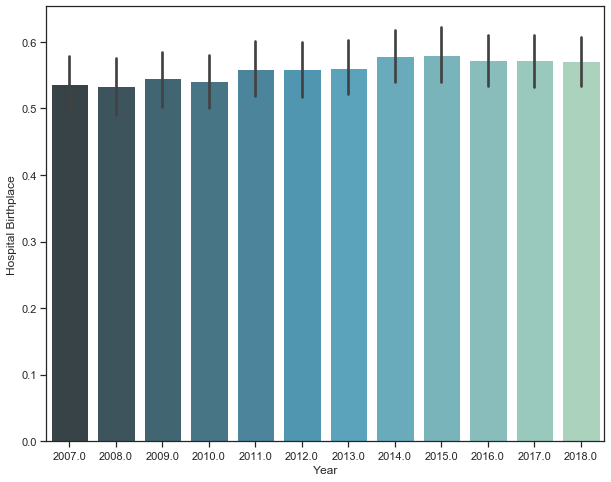

In [2917]:
ax = sns.barplot("Year", y="Hospital Birthplace", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

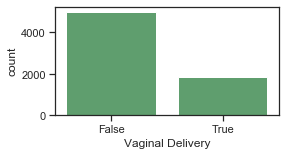

In [2918]:
ax = sns.countplot(x="Vaginal Delivery", data=midwives_merged, color="g", order=midwives_merged["Vaginal Delivery"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

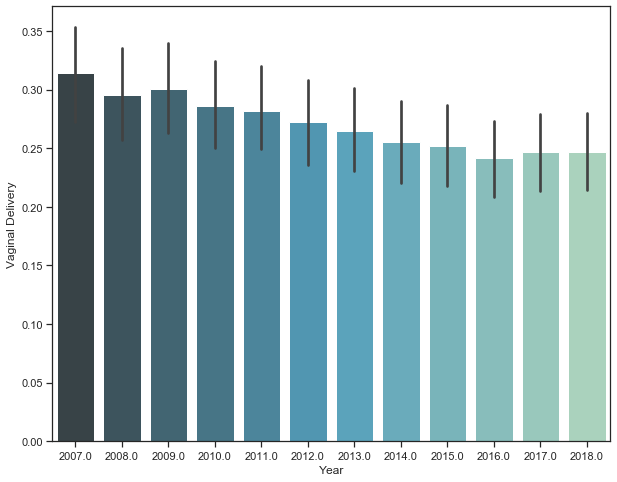

In [2919]:
ax = sns.barplot("Year", y="Vaginal Delivery", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

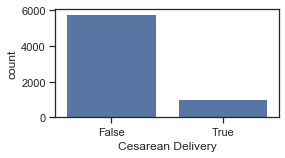

In [2920]:
ax = sns.countplot(x="Cesarean Delivery", data=midwives_merged, color="b", order=midwives_merged["Cesarean Delivery"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

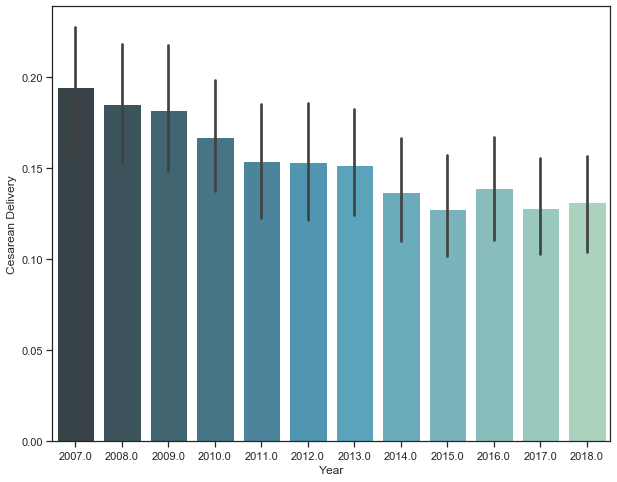

In [2921]:
ax = sns.barplot("Year", y="Cesarean Delivery", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

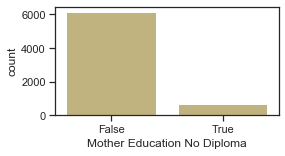

In [2922]:
ax = sns.countplot(x="Mother Education No Diploma", data=midwives_merged, color="y", order=midwives_merged["Mother Education No Diploma"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

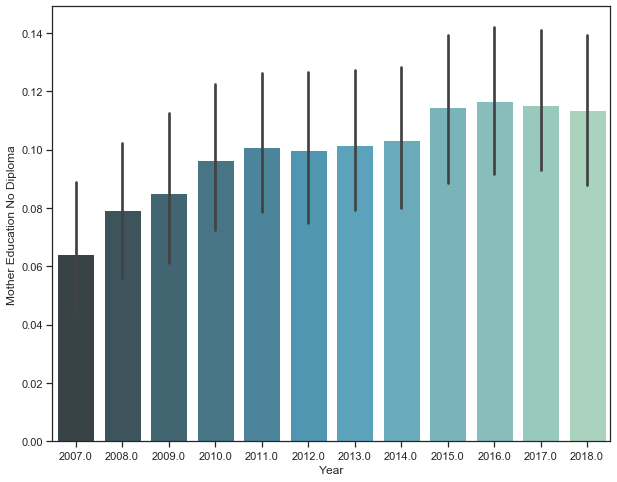

In [2923]:
ax = sns.barplot("Year", y="Mother Education No Diploma", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

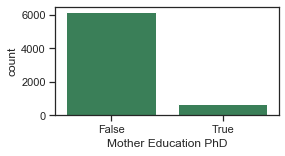

In [2924]:
ax = sns.countplot(x="Mother Education PhD", data=midwives_merged, color="seagreen", order=midwives_merged["Mother Education PhD"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

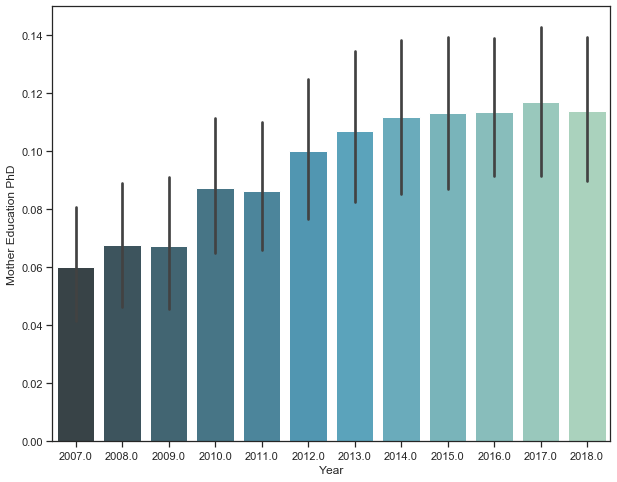

In [2925]:
ax = sns.barplot("Year", y="Mother Education PhD", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

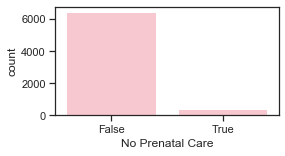

In [2926]:
ax = sns.countplot(x="No Prenatal Care", data=midwives_merged, color="pink", order=midwives_merged["No Prenatal Care"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

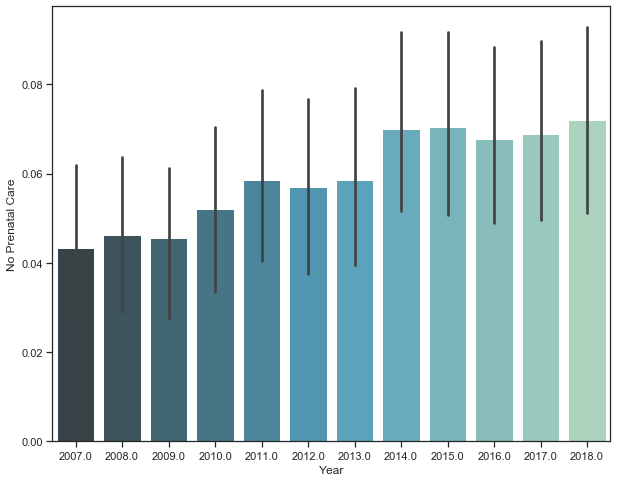

In [2927]:
ax = sns.barplot("Year", y="No Prenatal Care", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

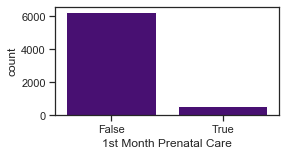

In [2928]:
ax = sns.countplot(x="1st Month Prenatal Care", data=midwives_merged, color="indigo", order=midwives_merged["1st Month Prenatal Care"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

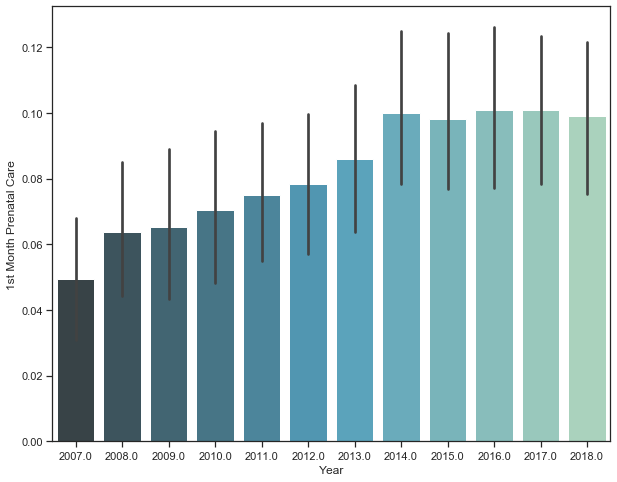

In [2929]:
ax = sns.barplot("Year", y="1st Month Prenatal Care", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

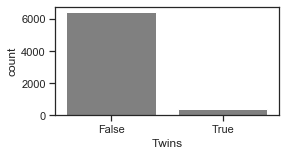

In [2930]:
ax = sns.countplot(x="Twins", data=midwives_merged, color="gray", order=midwives_merged["Twins"].value_counts().index)
ax.get_figure().set_size_inches(4, 2)

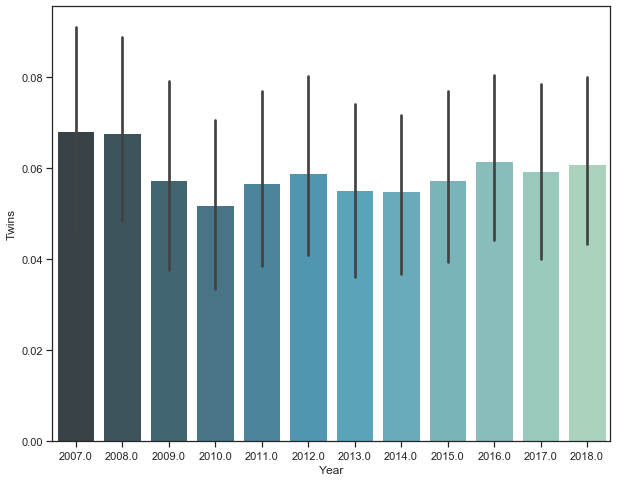

In [2931]:
ax = sns.barplot("Year", y="Twins", data=midwives_merged,
                 palette="GnBu_d")
ax.get_figure().set_size_inches(10, 8)

**Observations**
- Early prenatal care (staring in the 1st month) has increased over time, but very similar to numbers for no prenatal care category.
- Ceserean deliveries have decreased over time. 

## 4.6 Heatmap Analysis

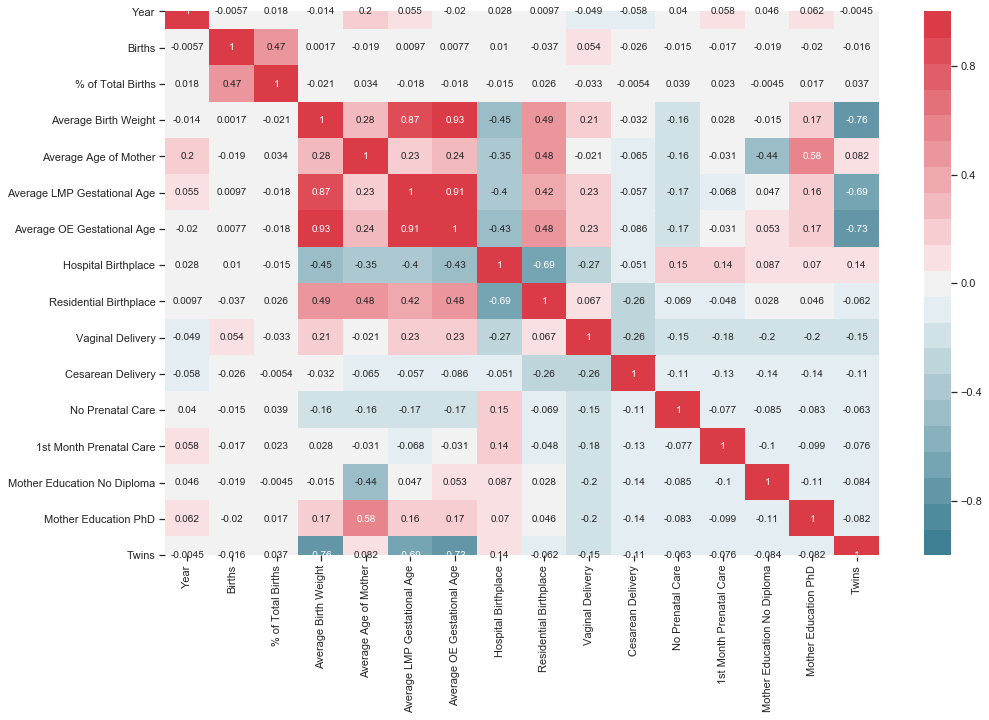

In [2942]:
fig, ax = plt.subplots(figsize=(16, 10))
a = sns.heatmap(midwives_merged.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

**Observations**
- Looking at average birth weight, most correlated are age and residential birthplace.

# 5. Model Building

## 5.1 Linear Regression Models

In [2680]:
# Linear Regression 1
# prenatal care and birth weight, 2017 and 2018 test data, national

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Births", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training.loc[:, feature_cols]
y_train = midwives_merged_training.loc[:, target_col]
X_test = midwives_merged_testing.loc[:, feature_cols]
y_test = midwives_merged_testing.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.37199585777631927
Training Data R-Squared: 0.3945762001981681
Test Data RMSE: 199.61322702053414
Test Data MAE: 131.9389067591602


In [2789]:
# Linear Regression 2
# birth weight, vaginal delivery, residential birthplace, 2017 and 2018 test data, national

feature_cols = ["Vaginal Delivery", "Residential Birthplace"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training.loc[:, feature_cols]
y_train = midwives_merged_training.loc[:, target_col]
X_test = midwives_merged_testing.loc[:, feature_cols]
y_test = midwives_merged_testing.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.2550463796376784
Training Data R-Squared: 0.2779765402005071
Test Data RMSE: 217.40657740775467
Test Data MAE: 130.5302386134507


In [2682]:
# Linear Regression 2.1
# birth weight, vaginal delivery, residential birthplace, 2017 and 2018 test data, california only

feature_cols = ["Vaginal Delivery", "Residential Birthplace"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_california.loc[:, feature_cols]
y_train = midwives_merged_training_california.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.38963005996820416
Training Data R-Squared: 0.2551436135677754
Test Data RMSE: 177.82875907128775
Test Data MAE: 109.27308858858844


In [2683]:
# Linear Regression 2.2
# birth weight, vaginal delivery, residential birthplace, 2017 and 2018 test data, new york only 

feature_cols = ["Vaginal Delivery", "Residential Birthplace"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE

Test Data R-Squared: 0.2508837822464499
Training Data R-Squared: 0.2496263762897457
Test Data RMSE: 222.1005710742536
Test Data MAE: 155.93103786224862


In [2936]:
# Linear Regression 3
# births prediction model for 2017 and 2018 for california

feature_cols = ["Average Age of Mother", "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE 

# find RMSE on the training data
y_pred_train = lr_linear.predict(X_train)
print('Train Data RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))) # Finding RMSE


Test Data R-Squared: 0.7492203484990398
Training Data R-Squared: 0.76399289297044
Test Data RMSE: 9892.981061784372
Test Data MAE: 8892.691693711191
Train Data RMSE: 8138.593483841455


In [2938]:
# Linear Regression 5
# births prediction model for 2017 and 2018 for new york

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE 

# find RMSE on the training data
y_pred_train = lr_linear.predict(X_train)
print('Train Data RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))) # Finding RMSE

Test Data R-Squared: 0.7498694734462903
Training Data R-Squared: 0.7484312288470792
Test Data RMSE: 4295.067230582844
Test Data MAE: 3856.806423255818
Train Data RMSE: 4689.164947825651


In [2686]:
# Linear Regression 7
# birth weight prediction model for 2017 and 2018 for california

feature_cols = ["Average Age of Mother", "Mother Education No Diploma", "Mother Education PhD", "Births", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE 


Test Data R-Squared: 0.6645877844506723
Training Data R-Squared: 0.6488888718101051
Test Data RMSE: 131.82411581524
Test Data MAE: 109.49040544926363


In [2687]:
# Linear Regression 9
# birth weight prediction model for 2017 and 2018 for new york

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Births", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

# Creating a linear regression model instance and fitting the training data to it
lr_linear = LinearRegression()
lr_linear.fit(X_train, y_train)

# Evaluating the model 
print('Test Data R-Squared:', lr_linear.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr_linear.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 

y_pred = lr_linear.predict(X_test)
print('Test Data RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # Finding RMSE
print ('Test Data MAE:', metrics.mean_absolute_error(y_test, y_pred))         # Finding MAE 

Test Data R-Squared: 0.6482482322092383
Training Data R-Squared: 0.6093231783132238
Test Data RMSE: 152.19248909625335
Test Data MAE: 124.6394605502621


## 5.2 Ridge Regression for Linear Regression Models

- Ridge regression on Linear Regression 3: births prediction model for 2017 and 2018 for California
- Ridge regression on Linear Regression 5: births prediction model for 2017 and 2018 for New York

In [2696]:
# ridge regression on Linear Regression 3 model

feature_cols = ["Average Age of Mother", "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]


In [2697]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_scaled.head()

,Average Age of Mother,Mother Education No Diploma,Mother Education PhD,Average Birth Weight,Vaginal Delivery,Cesarean Delivery,Residential Birthplace,Hospital Birthplace,No Prenatal Care,1st Month Prenatal Care
0,-1.627172,-0.334064,-0.327812,-0.491022,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
1,-0.713873,-0.334064,-0.327812,0.676805,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
2,-0.868487,-0.334064,-0.327812,0.106570,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
3,-0.692299,-0.334064,-0.327812,0.130092,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
4,-0.239245,-0.334064,-0.327812,0.181127,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592


In [2698]:
X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

scaler = StandardScaler()
scaler.fit(X_train) # need to fit on the training data
X_train = scaler.transform(X_train) # need to transform on the training data
X_test = scaler.transform(X_test) # use same scaler to transform on X_test

In [2699]:
X_train

array([[ 0.78486157, -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461],
       [-1.52844721, -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461],
       [-0.37196704, -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461],
       ...,
       [-0.4747535 , -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461],
       [-0.12745136, -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461],
       [-1.06620017, -0.38569461, -0.38569461, ..., -1.03664211,
        -0.26311741, -0.38569461]])

In [2700]:
X_test

array([[-1.63543976e+01, -3.85694608e-01, -3.85694608e-01,
         1.21470894e-01,  2.03670031e+00, -3.85694608e-01,
        -7.37864787e-01, -1.03664211e+00, -2.63117406e-01,
        -3.85694608e-01],
       [-1.61817405e+01, -3.85694608e-01, -3.85694608e-01,
         1.26711695e-01,  2.03670031e+00, -3.85694608e-01,
        -7.37864787e-01, -1.03664211e+00, -2.63117406e-01,
        -3.85694608e-01],
       [-1.70285828e+01, -3.85694608e-01, -3.85694608e-01,
         2.17437761e-02, -4.90990253e-01, -3.85694608e-01,
        -7.37864787e-01,  9.64653075e-01, -2.63117406e-01,
         2.59272486e+00],
       [-1.68888127e+01, -3.85694608e-01, -3.85694608e-01,
         3.19975163e-02, -4.90990253e-01, -3.85694608e-01,
        -7.37864787e-01,  9.64653075e-01, -2.63117406e-01,
         2.59272486e+00],
       [-1.57542084e+01, -3.85694608e-01, -3.85694608e-01,
        -1.68482094e-01, -4.90990253e-01,  2.59272486e+00,
        -7.37864787e-01,  9.64653075e-01, -2.63117406e-01,
        -3.

In [2701]:
X_train.mean(axis=0)

array([ 8.48082595e-15,  1.91693184e-17,  9.58465921e-18, -1.39297047e-15,
        1.27795456e-17,  1.27795456e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.91693184e-17])

In [2702]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2703]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7445468187837743

In [2704]:
# ridge regression on Linear Regression 5 model

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

In [2705]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_scaled.head()

,Mother Education No Diploma,Mother Education PhD,Average Birth Weight,Vaginal Delivery,Cesarean Delivery,Residential Birthplace,Hospital Birthplace,No Prenatal Care,1st Month Prenatal Care
0,-0.334064,-0.327812,-0.491022,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
1,-0.334064,-0.327812,0.676805,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
2,-0.334064,-0.327812,0.106570,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
3,-0.334064,-0.327812,0.130092,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592
4,-0.334064,-0.327812,0.181127,1.647721,-0.423821,-0.611634,-1.128795,-0.25311,-0.302592


In [2706]:
X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

scaler = StandardScaler()
scaler.fit(X_train) # need to fit on the training data
X_train = scaler.transform(X_train) # need to transform on the training data
X_test = scaler.transform(X_test) # use same scaler to transform on X_test

In [2707]:
X_train

array([[-0.38118125, -0.38118125,  0.21310065, ..., -1.07763181,
        -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.16254131, ..., -1.07763181,
        -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.19225065, ..., -1.07763181,
        -0.26832816, -0.38118125],
       ...,
       [-0.38118125, -0.38118125,  0.83791327, ..., -1.07763181,
        -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.85360805, ..., -1.07763181,
        -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.89626272, ..., -1.07763181,
        -0.26832816, -0.38118125]])

In [2708]:
X_test

array([[-0.38118125, -0.38118125,  0.207449  ,  1.99071921, -0.3939193 ,
        -0.6992059 , -1.07763181, -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.22230367,  1.99071921, -0.3939193 ,
        -0.6992059 , -1.07763181, -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125, -0.03244055, -0.50233101, -0.3939193 ,
        -0.6992059 ,  0.92796073, -0.26832816,  2.6234239 ],
       [-0.38118125, -0.38118125,  0.07753747, -0.50233101, -0.3939193 ,
        -0.6992059 ,  0.92796073, -0.26832816,  2.6234239 ],
       [-0.38118125, -0.38118125,  0.17720505, -0.50233101,  2.53859104,
        -0.6992059 ,  0.92796073, -0.26832816, -0.38118125],
       [-0.38118125, -0.38118125,  0.04236741, -0.50233101,  2.53859104,
        -0.6992059 ,  0.92796073, -0.26832816, -0.38118125],
       [ 2.6234239 , -0.38118125, -0.21657736, -0.50233101, -0.3939193 ,
        -0.6992059 ,  0.92796073, -0.26832816, -0.38118125],
       [ 2.6234239 , -0.38118125, -0.19435263, -0.50233101, -0

In [2709]:
X_train.mean(axis=0)

array([ 9.94229574e-18, -9.94229574e-18,  6.25950369e-16, -5.30255773e-17,
        1.15993450e-17,  0.00000000e+00,  1.06051155e-16, -7.95383659e-17,
        0.00000000e+00])

In [2710]:
X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [2711]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.7508536362323808

## 5.3 Logistic Regression Models

In [2805]:
# Logistic Regression Model 1: Maternal Age and Residential Birthplace, california only

feature_cols = ["Average Age of Mother"]
target_col = "Residential Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

lr_logistic1 = LogisticRegression(solver = "lbfgs")

In [2806]:
lr_logistic1.fit(X_train, y_train)
lr_logistic1.score(X_test, y_test)

0.6666666666666666

In [2807]:
# the null model
y.value_counts(normalize=True)

False    0.648649
True     0.351351
Name: Residential Birthplace, dtype: float64

In [2793]:
# Logistic Regression Model 2: Maternal Age and Hospital Birthplace, california only

feature_cols = ["Average Age of Mother"]
target_col = "Hospital Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

lr_logistic2 = LogisticRegression(solver = "lbfgs")

In [2794]:
lr_logistic2.fit(X_train, y_train)
lr_logistic2.score(X_test, y_test)

0.4666666666666667

In [2795]:
# the null model
y.value_counts(normalize=True)

True     0.518919
False    0.481081
Name: Hospital Birthplace, dtype: float64

In [2817]:
# Logistic Regression Model 3: Prenatal Care, Maternal Age, and Vaginal Delivery, california only

feature_cols = ["1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Vaginal Delivery"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

lr_logistic3 = LogisticRegression(solver = "lbfgs")

In [2818]:
lr_logistic3.fit(X_train, y_train)
lr_logistic3.score(X_test, y_test)

0.8

In [2819]:
# the null model
y.value_counts(normalize=True)

False    0.805405
True     0.194595
Name: Vaginal Delivery, dtype: float64

In [2747]:
# Logistic Regression Model 4: Residential birthplace and birth weight, california only

feature_cols = ["Average Birth Weight"]
target_col = "Residential Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_california.loc[:, feature_cols]
y_train = midwives_merged_training_california.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

lr_logistic4 = LogisticRegression(solver = "lbfgs")

In [2748]:
lr_logistic4.fit(X_train, y_train)
lr_logistic4.score(X_test, y_test)

0.6666666666666666

In [2749]:
# the null model
y.value_counts(normalize=True)

False    0.648649
True     0.351351
Name: Residential Birthplace, dtype: float64

In [2885]:
# Logistic Regression Model 5: Hospital birthplace and birth weight, california only

feature_cols = ["Average Birth Weight"]
target_col = "Hospital Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_california.loc[:, feature_cols]
y_train = midwives_merged_training_california.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

lr_logistic5 = LogisticRegression(solver = "lbfgs")

In [2886]:
lr_logistic5.fit(X_train, y_train)
lr_logistic5.score(X_test, y_test)

0.8666666666666667

In [2887]:
# the null model
y.value_counts(normalize=True)

True     0.518919
False    0.481081
Name: Hospital Birthplace, dtype: float64

In [2753]:
# Logistic Regression Model 6: Maternal Age and Residential Birthplace, new york only

feature_cols = ["Average Age of Mother"]
target_col = "Residential Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

lr_logistic6 = LogisticRegression(solver = "lbfgs")

In [2754]:
lr_logistic6.fit(X_train, y_train)
lr_logistic6.score(X_test, y_test)

0.6451612903225806

In [2755]:
# the null model
y.value_counts(normalize=True)

False    0.666667
True     0.333333
Name: Residential Birthplace, dtype: float64

In [2756]:
# Logistic Regression Model 7: Maternal Age and Hospital Birthplace, new york only

feature_cols = ["Average Age of Mother"]
target_col = "Hospital Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

lr_logistic7 = LogisticRegression(solver = "lbfgs")

In [2757]:
lr_logistic7.fit(X_train, y_train)
lr_logistic7.score(X_test, y_test)

0.5161290322580645

In [2758]:
# the null model
y.value_counts(normalize=True)

True     0.533333
False    0.466667
Name: Hospital Birthplace, dtype: float64

In [2830]:
# Logistic Regression Model 8: Prenatal Care, Maternal Age, and Vaginal Delivery, new york only

feature_cols = ["1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Vaginal Delivery"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

lr_logistic8 = LogisticRegression(solver = "lbfgs")

In [2831]:
lr_logistic8.fit(X_train, y_train)
lr_logistic8.score(X_test, y_test)

0.8064516129032258

In [2832]:
# the null model
y.value_counts(normalize=True)

False    0.8
True     0.2
Name: Vaginal Delivery, dtype: float64

In [2841]:
# Logistic Regression Model 9: Residential birthplace and birth weight, new york only

feature_cols = ["Average Birth Weight"]
target_col = "Residential Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

lr_logistic9 = LogisticRegression(solver = "lbfgs")

In [2842]:
lr_logistic9.fit(X_train, y_train)
lr_logistic9.score(X_test, y_test)

0.9032258064516129

In [2843]:
# the null model
y.value_counts(normalize=True)

False    0.666667
True     0.333333
Name: Residential Birthplace, dtype: float64

In [2852]:
# Logistic Regression Model 10: Hospital birthplace and birth weight, new york only

feature_cols = ["Average Birth Weight"]
target_col = "Hospital Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

lr_logistic10 = LogisticRegression(solver = "lbfgs")

In [2853]:
lr_logistic10.fit(X_train, y_train)
lr_logistic10.score(X_test, y_test)

0.7741935483870968

In [2854]:
# the null model
y.value_counts(normalize=True)

True     0.533333
False    0.466667
Name: Hospital Birthplace, dtype: float64

## 5.4 Calculating F Beta Scores for Logistic Regression Models

**F Beta Scores on Logistic Regression Model 1**

In [2808]:
y_pred = lr_logistic1.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2809]:
y_pred_prob = lr_logistic1.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.40976056, 0.40913911, 0.41218993, 0.41168592, 0.40760152,
       0.40766063, 0.42054677, 0.42012929, 0.39689061, 0.39648054,
       0.41801386, 0.41619878, 0.41026385, 0.40961257, 0.40094031,
       0.39914852, 0.41041191, 0.40208728, 0.39449089, 0.39314693,
       0.40199901, 0.40155778, 0.40757197, 0.40763108, 0.40973096,
       0.40326477, 0.41026385, 0.40961257, 0.40199901, 0.40155778])

In [2810]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2811]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[ 0, 20],
       [ 0, 10]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


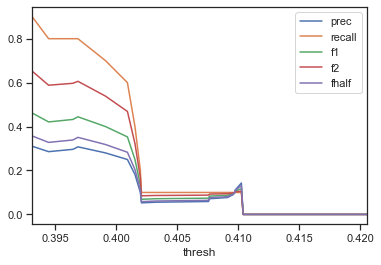

In [2812]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2813]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.393147,0.310345,0.9,0.461538
1,0.394491,0.285714,0.8,0.421053
2,0.396481,0.296296,0.8,0.432432
3,0.396891,0.307692,0.8,0.444444
4,0.399149,0.280000,0.7,0.400000
5,0.400940,0.250000,0.6,0.352941
6,0.401558,0.181818,0.4,0.250000
7,0.401999,0.100000,0.2,0.133333
8,0.402087,0.052632,0.1,0.068966
9,0.403265,0.055556,0.1,0.071429


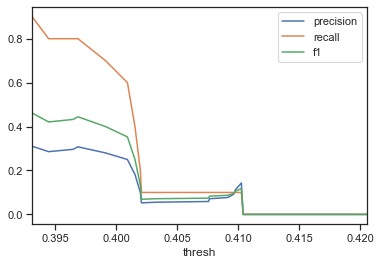

In [2814]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2777]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[15,  0],
       [16,  0]])

**F Beta Scores on Logistic Regression Model 2**

In [2796]:
y_pred = lr_logistic2.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2797]:
y_pred_prob = lr_logistic2.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.42859569, 0.42952559, 0.42496953, 0.42572064, 0.43183033,
       0.43174163, 0.41260667, 0.41322014, 0.44804084, 0.44866676,
       0.41633546, 0.41901736, 0.42784328, 0.42881705, 0.44188017,
       0.44460127, 0.42762205, 0.44014227, 0.45170921, 0.45376941,
       0.4402759 , 0.4409442 , 0.43187468, 0.43178598, 0.42863996,
       0.43836132, 0.42784328, 0.42881705, 0.4402759 , 0.4409442 ])

In [2798]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2799]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[ 0, 14],
       [ 0, 16]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


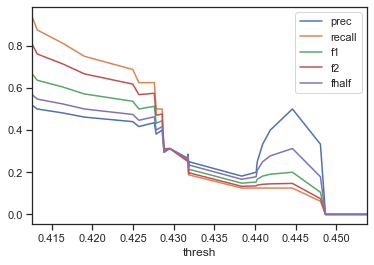

In [2800]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")
# need an update to best score and best thresh here -- 
# check the dataframe below for each value

In [2801]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.412607,0.517241,0.9375,0.666667
1,0.413220,0.500000,0.8750,0.636364
2,0.416335,0.481481,0.8125,0.604651
3,0.419017,0.461538,0.7500,0.571429
4,0.424970,0.440000,0.6875,0.536585
5,0.425721,0.416667,0.6250,0.500000
6,0.427622,0.434783,0.6250,0.512821
7,0.427843,0.380952,0.5000,0.432432
8,0.428596,0.400000,0.5000,0.444444
9,0.428640,0.368421,0.4375,0.400000


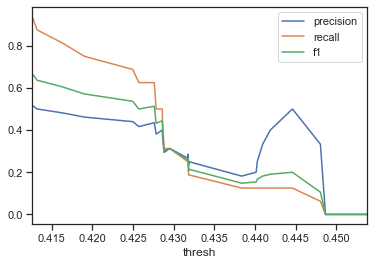

In [2802]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2788]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[ 0, 15],
       [ 0, 16]])

**F Beta Scores on Logistic Regression Model 3**

In [2820]:
y_pred = lr_logistic3.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2821]:
y_pred_prob = lr_logistic3.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.31247947, 0.31130219, 0.11535174, 0.11489936, 0.30839753,
       0.30850897, 0.33320348, 0.33239147, 0.28849508, 0.287745  ,
       0.32828877, 0.3247847 , 0.31343428, 0.31219894, 0.10557803,
       0.10408278, 0.3137154 , 0.29807759, 0.28411835, 0.28168072,
       0.29791365, 0.29709476, 0.30834182, 0.30845325, 0.31242335,
       0.30026833, 0.31343428, 0.31219894, 0.29791365, 0.29709476])

In [2822]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2823]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[11, 13],
       [ 2,  4]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


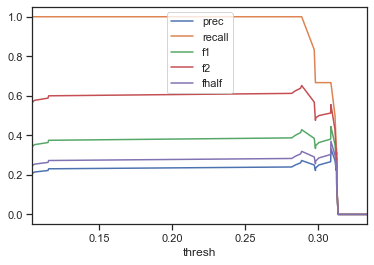

In [2824]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2825]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.104083,0.206897,1.000000,0.342857
1,0.105578,0.214286,1.000000,0.352941
2,0.114899,0.222222,1.000000,0.363636
3,0.115352,0.230769,1.000000,0.375000
4,0.281681,0.240000,1.000000,0.387097
5,0.284118,0.250000,1.000000,0.400000
6,0.287745,0.260870,1.000000,0.413793
7,0.288495,0.272727,1.000000,0.428571
8,0.297095,0.250000,0.833333,0.384615
9,0.297914,0.222222,0.666667,0.333333


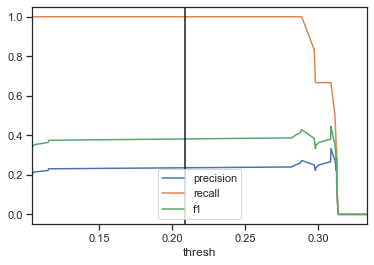

In [2826]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2829]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[ 4, 20],
       [ 0,  6]])

**F Beta Scores on Logistic Regression Model 5**

In [2888]:
y_pred = lr_logistic5.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2889]:
y_pred_prob = lr_logistic5.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.55148666, 0.54833342, 0.61042711, 0.6044835 , 0.71331352,
       0.63679021, 0.725003  , 0.64585754, 0.64792414, 0.61139265,
       0.85096816, 0.93180868, 0.57917808, 0.575055  , 0.25349512,
       0.23878372, 0.17582672, 0.22515195, 0.15562933, 0.24746386,
       0.19335189, 0.17896557, 0.70992232, 0.62967199, 0.9996317 ,
       0.99841629, 0.57987545, 0.5753257 , 0.19325112, 0.17929136])

In [2890]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2891]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[10,  4],
       [ 0, 16]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


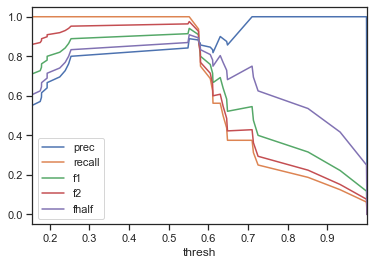

In [2892]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2893]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.155629,0.551724,1.0000,0.711111
1,0.175827,0.571429,1.0000,0.727273
2,0.178966,0.592593,1.0000,0.744186
3,0.179291,0.615385,1.0000,0.761905
4,0.193251,0.640000,1.0000,0.780488
5,0.193352,0.666667,1.0000,0.800000
6,0.225152,0.695652,1.0000,0.820513
7,0.238784,0.727273,1.0000,0.842105
8,0.247464,0.761905,1.0000,0.864865
9,0.253495,0.800000,1.0000,0.888889


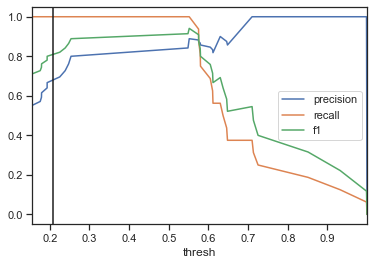

In [2894]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2895]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[ 6,  8],
       [ 0, 16]])

**F Beta Scores on Logistic Regression Model 8**

In [2833]:
y_pred = lr_logistic8.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2834]:
y_pred_prob = lr_logistic8.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.32455377, 0.32366313, 0.12032448, 0.11960017, 0.3096438 ,
       0.30709664, 0.34342891, 0.34251273, 0.29745068, 0.29654875,
       0.33256978, 0.32885768, 0.32566886, 0.32499957, 0.1096514 ,
       0.10760923, 0.32144213, 0.32183022, 0.29248341, 0.29174778,
       0.29227312, 0.30601628, 0.30396948, 0.3096438 , 0.30709664,
       0.31395131, 0.31922917, 0.32561306, 0.32488809, 0.30623218,
       0.30418457])

In [2835]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2836]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[ 9, 16],
       [ 0,  6]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


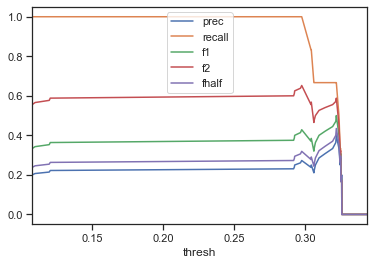

In [2837]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2838]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.107609,0.200000,1.000000,0.333333
1,0.109651,0.206897,1.000000,0.342857
2,0.119600,0.214286,1.000000,0.352941
3,0.120324,0.222222,1.000000,0.363636
4,0.291748,0.230769,1.000000,0.375000
5,0.292273,0.240000,1.000000,0.387097
6,0.292483,0.250000,1.000000,0.400000
7,0.296549,0.260870,1.000000,0.413793
8,0.297451,0.272727,1.000000,0.428571
9,0.303969,0.238095,0.833333,0.370370


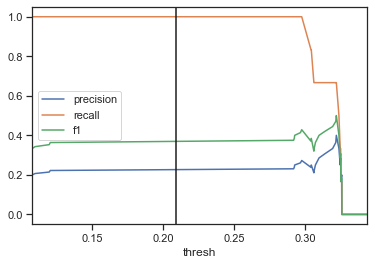

In [2839]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2840]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[ 4, 21],
       [ 0,  6]])

**F Beta Scores on Logistic Regression Model 9**

In [2844]:
y_pred = lr_logistic9.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2845]:
y_pred_prob = lr_logistic9.predict_proba(X_test)[:, 1]
y_pred_prob

array([2.68172735e-01, 2.77520485e-01, 1.46185091e-01, 1.95290758e-01,
       2.49768605e-01, 1.78352341e-01, 8.71515525e-02, 9.29256553e-02,
       3.79930103e-01, 4.96153686e-01, 4.35897115e-03, 4.79633164e-03,
       2.43400453e-01, 2.51999563e-01, 8.86762300e-01, 3.21686705e-01,
       7.24659089e-01, 3.67935880e-01, 9.13299940e-01, 6.90684273e-01,
       1.35240148e-03, 8.12118165e-01, 7.83143194e-01, 2.49768605e-01,
       1.78352341e-01, 3.77828455e-05, 1.85256418e-05, 2.43489690e-01,
       2.51657235e-01, 8.14252683e-01, 7.83492700e-01])

In [2846]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2847]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[18,  2],
       [ 1, 10]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


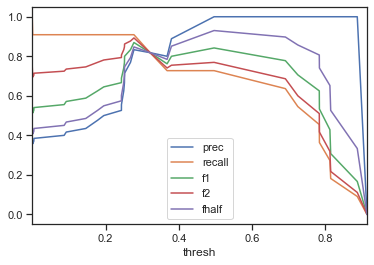

In [2848]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2849]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.000019,0.366667,1.000000,0.536585
1,0.000038,0.379310,1.000000,0.550000
2,0.001352,0.357143,0.909091,0.512821
3,0.004359,0.370370,0.909091,0.526316
4,0.004796,0.384615,0.909091,0.540541
5,0.087152,0.400000,0.909091,0.555556
6,0.092926,0.416667,0.909091,0.571429
7,0.146185,0.434783,0.909091,0.588235
8,0.178352,0.476190,0.909091,0.625000
9,0.195291,0.500000,0.909091,0.645161


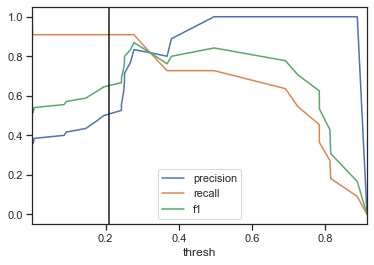

In [2850]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2851]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[10, 10],
       [ 1, 10]])

**F Beta Scores on Logistic Regression Model 10**

In [2855]:
y_pred = lr_logistic10.predict(X_test)
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

In [2856]:
y_pred_prob = lr_logistic10.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.51754626, 0.51037661, 0.63034956, 0.57962218, 0.53211816,
       0.59608443, 0.70878633, 0.69984405, 0.43956693, 0.37006764,
       0.94086469, 0.9375241 , 0.53731307, 0.53031753, 0.14246829,
       0.47829628, 0.24402328, 0.44726936, 0.12179308, 0.26296318,
       0.97016269, 0.19263777, 0.210242  , 0.53211816, 0.59608443,
       0.99653591, 0.99775314, 0.5372397 , 0.53059319, 0.19131014,
       0.21003381])

In [2857]:
y_pred_low_thresh = y_pred_prob > .3
cm = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_low_thresh)

In [2858]:
metrics.confusion_matrix(y_test, y_pred_low_thresh)

array([[ 8,  7],
       [ 0, 16]])

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


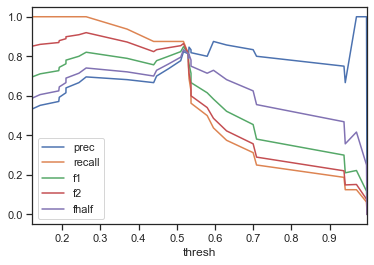

In [2859]:
thresholds = sorted(set(y_pred_prob))

precision_scores = []
recall_scores = []
f1_scores = []
f2_scores = []
fhalf_scores = []
for thresh in thresholds:
    y_pred_thresh = y_pred_prob > thresh
    f1_scores.append(metrics.f1_score(y_test, y_pred_thresh))
    f2_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=2))
    fhalf_scores.append(metrics.fbeta_score(y_test, y_pred_thresh, beta=0.5))
    precision_scores.append(metrics.precision_score(y_test, y_pred_thresh))
    recall_scores.append(metrics.recall_score(y_test, y_pred_thresh))

ax = pd.DataFrame(
    {
        "prec": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "f2": f2_scores,
        "fhalf": fhalf_scores,
        "thresh": thresholds,
    }
).plot(x="thresh")


In [2860]:
# F1
scores_df = pd.DataFrame(
    {
        "thresh": thresholds,
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
    }
)
scores_df

,thresh,precision,recall,f1
0,0.121793,0.533333,1.0000,0.695652
1,0.142468,0.551724,1.0000,0.711111
2,0.191310,0.571429,1.0000,0.727273
3,0.192638,0.592593,1.0000,0.744186
4,0.210034,0.615385,1.0000,0.761905
5,0.210242,0.640000,1.0000,0.780488
6,0.244023,0.666667,1.0000,0.800000
7,0.262963,0.695652,1.0000,0.820513
8,0.370068,0.681818,0.9375,0.789474
9,0.439567,0.666667,0.8750,0.756757


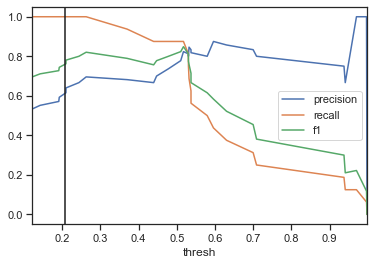

In [2861]:
ax = scores_df.plot(x="thresh")
ax.axvline(best_thresh, color="k");

In [2862]:
# confusion matrix for the best threshold
y_pred_thresh = y_pred_prob > best_thresh
cm = metrics.confusion_matrix(y_test, y_pred=y_pred_thresh)
cm

array([[ 4, 11],
       [ 0, 16]])

## 5.5 Random Forest Regression Models

In [2863]:
# random forest regression model 1: average birth weight california

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Births", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

rfr1 = RandomForestRegressor(n_estimators=150)
rfr1.fit(X_train, y_train)
print(rfr1.score(X_train, y_train))
print(rfr1.score(X_test, y_test))

0.9844168117795675
0.9198980916035714


In [2865]:
# random forest regression model 2: average birth weight, new york

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Births", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Average Birth Weight"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

rfr2 = RandomForestRegressor(n_estimators=150)
rfr2.fit(X_train, y_train)
print(rfr2.score(X_train, y_train))
print(rfr2.score(X_test, y_test))

0.9681050840239621
0.6355375261062322


In [2957]:
# random forest regression model 3: births, california

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

rfr3 = RandomForestRegressor(n_estimators=150)
rfr3.fit(X_train, y_train)
print(rfr3.score(X_train, y_train))
print(rfr3.score(X_test, y_test))

0.9756410559134918
0.6666201294567664


In [2867]:
# random forest regression model 4: births, new york

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

feature_cols = ["Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Births"

X = midwives_merged.loc[:, feature_cols]
y = midwives_merged.loc[:, target_col]

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

rfr4 = RandomForestRegressor(n_estimators=150)
rfr4.fit(X_train, y_train)
print(rfr4.score(X_train, y_train))
print(rfr4.score(X_test, y_test))

0.9881787559422336
0.894053014557267


## 5.6 GridSearchCV and Feature Importances

In [2984]:
grid = GridSearchCV(
    estimator=RandomForestRegressor(n_estimators=100, random_state=1),
    param_grid={"max_depth": range(1, 21)},
    cv=KFold(n_splits=10, shuffle=True, random_state=1),
    return_train_score=True,
)
grid.fit(X, y)

/Users/cheyanne/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None, pa

In [2985]:
# Use 10-fold cross-validation with each value of max_depth.
scores = -(
    pd.DataFrame(grid.cv_results_)
    .loc[:, ["param_max_depth", "mean_test_score"]]
    .set_index("param_max_depth")
)
scores

,mean_test_score
param_max_depth,
1,-0.011898
2,-0.026552
3,-0.044661
4,0.032732
5,0.341164
6,0.765699
7,0.948312
8,1.003828
9,1.005903


In [2986]:
# Show the best RMSE and the corresponding max_depth.
grid.best_score_, grid.best_params_

(0.04466130326080504, {'max_depth': 3})

In [2987]:
# Compute feature importances.
pd.DataFrame(
    {"feature": feature_cols, "importance": grid.best_estimator_.feature_importances_}
).sort_values("importance", ascending=False)


,feature,importance
0,Average Birth Weight,0.712733
5,Average Age of Mother,0.171461
1,Vaginal Delivery,0.109997
3,Residential Birthplace,0.002511
4,Hospital Birthplace,0.001913
2,Cesarean Delivery,0.001384


## 5.7 Random Forest Classification Models

In [2988]:
# random forest classification model 1: residential birthplace, birth weight, new york
# based on logistic regression model 9

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

feature_cols = ["Average Birth Weight"]
target_col = "Residential Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

X_train = midwives_merged_training_newyork.loc[:, feature_cols]
y_train = midwives_merged_training_newyork.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

rfc1 = RandomForestClassifier(n_estimators=150)
rfc1.fit(X_train, y_train)
print(rfc1.score(X_train, y_train))
print(rfc1.score(X_test, y_test))

1.0
0.9354838709677419


In [2869]:
y.value_counts(normalize=True)

False    0.666667
True     0.333333
Name: Residential Birthplace, dtype: float64

In [2949]:
# random forest classification model 2: maternal age, residential birthplace, california
# based on logistic regression model 1

feature_cols = ["Average Age of Mother"]
target_col = "Residential Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

rfc2 = RandomForestClassifier(n_estimators=500)
rfc2.fit(X_train, y_train)
print(rfc2.score(X_train, y_train))
print(rfc2.score(X_test, y_test))

0.6474820143884892
0.6666666666666666


In [2871]:
y.value_counts(normalize=True)

False    0.648649
True     0.351351
Name: Residential Birthplace, dtype: float64

In [2872]:
# random forest classification model 3: birth weight, hospital birthplace, california
# based on logistic regression model 5

feature_cols = ["Average Birth Weight"]
target_col = "Hospital Birthplace"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

X_train = midwives_merged_training_california.loc[:, feature_cols]
y_train = midwives_merged_training_california.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

rfc3 = RandomForestClassifier(n_estimators=150)
rfc3.fit(X_train, y_train)
print(rfc3.score(X_train, y_train))
print(rfc3.score(X_test, y_test))

0.9856115107913669
0.7666666666666667


In [2873]:
y.value_counts(normalize=True)

True     0.518919
False    0.481081
Name: Hospital Birthplace, dtype: float64

In [2952]:
# random forest classification model 4: maternal age, prenatal care, vaginal delivery, new york
# based on logistic regression model 8

feature_cols = ["1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Vaginal Delivery"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

rfc4 = RandomForestClassifier(n_estimators=150)
rfc4.fit(X_train, y_train)
print(rfc4.score(X_train, y_train))
print(rfc4.score(X_test, y_test))

0.7985074626865671
0.8064516129032258


In [2875]:
y.value_counts(normalize=True)

False    0.8
True     0.2
Name: Vaginal Delivery, dtype: float64

In [2876]:
# random forest classification model 5: maternal age, prenatal care, vaginal delivery, california
# based on logistic regression model 3

feature_cols = ["1st Month Prenatal Care", "Average Age of Mother"]
target_col = "Vaginal Delivery"

X = midwives_merged_california.loc[:, feature_cols]
y = midwives_merged_california.loc[:, target_col]

X_train = midwives_merged_training_california_ts.loc[:, feature_cols]
y_train = midwives_merged_training_california_ts.loc[:, target_col]
X_test = midwives_merged_testing_california.loc[:, feature_cols]
y_test = midwives_merged_testing_california.loc[:, target_col]

rfc5 = RandomForestClassifier(n_estimators=150)
rfc5.fit(X_train, y_train)
print(rfc5.score(X_train, y_train))
print(rfc5.score(X_test, y_test))

0.8057553956834532
0.8


In [2877]:
y.value_counts(normalize=True)

False    0.805405
True     0.194595
Name: Vaginal Delivery, dtype: float64

In [2878]:
# random forest classification model 6: hospital birthplace, birth weight, new york
# based on logistic regression model 10

feature_cols = ["Average Birth Weight"]
target_col = "Hospital Birthplace"

X = midwives_merged_newyork.loc[:, feature_cols]
y = midwives_merged_newyork.loc[:, target_col]

X_train = midwives_merged_training_newyork_ts.loc[:, feature_cols]
y_train = midwives_merged_training_newyork_ts.loc[:, target_col]
X_test = midwives_merged_testing_newyork.loc[:, feature_cols]
y_test = midwives_merged_testing_newyork.loc[:, target_col]

rfc6 = RandomForestClassifier(n_estimators=150)
rfc6.fit(X_train, y_train)
print(rfc6.score(X_train, y_train))
print(rfc6.score(X_test, y_test))

0.9328358208955224
0.7741935483870968


In [2879]:
y.value_counts(normalize=True)

True     0.533333
False    0.466667
Name: Hospital Birthplace, dtype: float64

# 6. Model Evaluation: Final Observations and Analysis

**Questions Explored and Model Results:**
- We don't have perfect models, so some additional model tuning is needed. General trend is overfitting. Details about all model runs is available below in the _Detailed Model Evaluation Summaries_ section. 
- Predict number of births for 2017 and 2018 based on past data for a specific state or region. 
    - Linear Regression models for predicting births did not overfit, but scores were < 80%.
    - Best performing model: 
        - 90% accuracy on the test set with Random Forest Regression model 4 for New York with full feature set. Performed better than Linear Regression Models at 75% accuracy on the test set.
        - GridSearchCV on Random Forest Regressor showed that birth weight, maternal age, and vaginal delivery were the most important features, with an optimal max_depth of 3.

|        LinReg Models      | Train | Test |  Features  |  Target  |  Region  |                               Notes                            |
|---------------------------|-------|------|------------|----------|----------|----------------------------------------------------------------|     
| Linear Regression Model 3 |  76%  | 75%  |  All       |  Births  |    CA    | RMSE on test low in comparison to max births; ridge reg shows  |
|                           |       |      |            |          |          |     errors in my model = 74% smaller than the null model       |
|                           |       |      |            |          |          |                                                                |
| Linear Regression Model 5 |  75%  | 75%  | All (- age)|  Births  |    NY    | RMSE on test low in comparison to max births; ridge reg shows  |
|                           |       |      |            |          |          |     errors in my model = 75% smaller than the null model       |
|                           |       |      |            |          |          |                                                                |
       


|            Best Model            | Train | Test | Features | Target |  Region  |    Notes   |
|----------------------------------|-------|------|----------|--------|--------- |------------|      
| Random Forest Regression Model 4 |   99% | 90%  |   All    | Births |    NY    | Overfitting|

    
    
        
- Explore correlation between maternal age and weight of baby. 
    - Best performing model: 
        - 92% accuracy on test with with Random Forest Regression model 1 for California with full feature set. 
        
        
        
|            Best Model            | Train | Test | Features |    Target    |  Region  |    Notes   |
|----------------------------------|-------|------|----------|--------------|--------- |------------|      
| Random Forest Regression Model 1 |   99% | 92%  |   All    | Birth Weight |    CA    | Overfitting|



- Look at relationship between maternal age and birthplace. 
    - Best performing model: 
        - no conclusion, relegated to future work. 
    - Some observations from EDA plot and visualizations. 
- From jointplot analysis: Residential birthplace correlated with slightly higher birth weights. Hospital birthplace also correlated with slightly higher birth weights. Average age of mother older for residential birthplace? For hospital birthplace, mean is lower than residential for maternal age. 
    - Best performing models for Birthplace and Birth Weight: 
        - 94% accuracy on the test set with Random Forest Classification model 1 for New York with Residential Birthplace as the target and Birth Weight as the feature. 
        - Logistic Regression models for California did well with 90% accuracy on the test set with Residential Birthplace as the target and Birth Weight as the feature, and 87% accuracy on the test set with Hospital Birthplace as the target and Birth Weight as the feature.
        
        
        
|             Best Models              | Train | Test |   F1   |   Features  |        Target          |  Region  |             Notes               |
|--------------------------------------|-------|------|--------|-------------|------------------------|--------- |---------------------------------|      
| Random Forest Classification Model 1 |  100% | 94%  |        | Birth Weight| Residential Birthplace |    NY    | Overfitting; score > null model |
|                                      |       |      |        |             |                        |          |                                 |
| Logistic Regression Model 9          |       | 90%  |  87%   | Birth Weight| Residential Birthplace |    CA    | Overfitting; score > null model |
|                                      |       |      |        |             |                        |          |                                 |
| Logistic Regression Model 5          |       | 87%  |  94%   | Birth Weight|  Hospital Birthplace   |    CA    | Overfitting; score > null model |



- Relationship between delivery type, prenatal care, and age:
    - Best performing models: 
        - 81% accuracy on the test set for both Logistic Regression and Random Forest Classification models for New York with Vaginal Delivery as the target and 1st Month Prenatal Care and Average Age of Mother as the feature set. 
        - 80% accuracy on the test for both Logistic Regression and Random Forest Classification models for California with the same target variable and feature set. 
        
        
|             Best Models              | Train | Test |   F1   |     Features      |     Target       |  Region  |               Notes                  |
|--------------------------------------|-------|------|--------|-------------------|------------------|----------|--------------------------------------|      
| Logistic Regression Model 8          |       | 81%  |  50%   | 1stMoPrenatal, Age| Vaginal Delivery |    NY    |  F1 score poor; score > null model   |
|                                      |       |      |        |                   |                  |          |                                      |
| Random Forest Classification Model 4 |       | 81%  |        | 1stMoPrenatal, Age| Vaginal Delivery |    NY    |  score > null model                  |
|                                      |       |      |        |                   |                  |          |                                      |
| Logistic Regression Model 3          |       | 80%  |  44%   | 1stMoPrenatal, Age| Vaginal Delivery |    CA    |  F1 score poor; score < null model   |
|                                      |       |      |        |                   |                  |          |                                      |
| Random Forest Classification Model 5 |  81%  | 80%  |        | 1stMoPrenatal, Age| Vaginal Delivery |    CA    |  score = null model                  | 



**Questions Explored and Observations from Plots and Visualizations:** 
- National trends over time: 
    - All births in the United States have been decreasing since 2007. Due to recession? 
    - However, there is a steady rise in midwife-attended births after a dip in 2011. What is this dip in 2011 and steady rise attributed to? 
- Maternal age and birth weight: 
    - Average maternal age is 28
    - Average birth weight is 3368 grams
    - Plots exploring relationship between features (Average Birth Weight and Average Age of Mother) show that there are two populations and a correlation between the two. 
    - Higher weight babies appear to be born to older mothers. 
- Residential vs. hospital birthplace and birth weight:  
    - Residential birthplace correlated with slightly higher birth weights. 
    - Hospital birthplace also correlated with slightly higher birth weights. 
- Residential vs. hospital birthplace and maternal age: 
    - Average age of mother older for residential birthplace.
    - For hospital birthplace, mean is lower than residential for maternal age.
    - Not a big difference between relationship between maternal age and residential vs. hospital birthplace, but looking at correlation matrix using a heatmap for average birth weight, most correlated features are age and residential birthplace.
- Prenatal care vs. lack of prenatal care: 
    - Early prenatal care (staring in the 1st month) has increased over time, but very similar to numbers for no prenatal care category.
    - Higher birth weight with earlier prenatal care shown in jointplots. 
    - Not much of a correlation between birth weight and lack of prenatal care shown in jointplots.
- Delivery type: 
    - Cesarean deliveries have decreased over time. 


**Detailed Model Evaluation Summaries**

**Linear Regression Summary:**
- Tested on data >= 2017, trained on data between 2007 - 2015. 
- Models performed better when I reduced it from national to specific states.
- Models performed better when I added features about maternal education, or just more features in general. 
- Best performing linear regression models: 
    - linear regression model 3:
        - Births prediction model for 2017 and 2018 for California
            - 75% on test data
            - 76% on training data
            - feature_cols = "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Births"
            - Train and test are decent, but thought it would be higher with all of the features. Small gap, not overfitting.
            - RMSE on test data: 9893
            - RMSE on training data: 8139
                - Data range for births: max number of births is 50293 in training set, so RMSE is low in comparison.
                - RMSE for test data is significantly highter for test data than training data, which suggests overfitting. 
            - MAE: 8892
            - Ridge Regression Results:
                - Errors in my model are 74% smaller than the null model, so the model is doing well. 
    - linear regression model 5: 
         - Births prediction model for 2017 and 2018 for New York
             - 75% on test data
             - 75% on training data
             - feature_cols = "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care"
             - target_col = "Births"
             - Train and test are decent, but thought it would do better with all of the features. No gap, completely balanced. 
             - RMSE on test data: 4295
             - RMSE on training data: 4689
                 - Data range for births: max number of births is 25412 in training set, so RMSE is low in comparison.
                 - RMSE for tes data is lower than training data, so we are not overfitting here. 
             - MAE: 3857
             - Ridge Regression Results: 
                 - Errors in my model are 75% smaller than the null model, so the model is doing well.

**Logistic Regression Summary:**
- Tested on data >= 2017, trained on data between 2007 - 2015. 
- Logistic Regression models I ran based on questions and observations from plots:
    - Analyze average age of mother in relation to birthplace (residential vs. hospital).
    - Run extra Logistic Regression Model to look at Vaginal Delivery target based on features: months of prenatal care, average age of mother.
    - From jointplot analysis: Residential birthplace correlated with slightly higher birth weights.
    - Hospital birthplace also correlated with slightly higher birth weights.
    - Average age of mother older for residential birthplace?
    - For hospital birthplace, mean is lower than residential for maternal age.
- Best performing logistic regression models: 
    - logistic regression model 9:
        - Exploring the relationship between Residential Birthplace and Birth Weight for California
            - 90% accuracy on test data
            - feature_cols = "Average Birth Weight"
            - target_col = "Residential Birthplace"
            - Null Model Scores:
                - false: 67%
                - true: 33%
                - Test scores are higher than the null model. 
            - F1 Scores:
                - Best F1: 87%
                - Precision: 83%
                - Recall: 91%
                - Good scores, but recall still much higher than precision. Overfitting.      
    - logistic regression model 5:
        - Exploring the relationship between Hospital Birthplace and Birth Weight for California
            - 87% accuracy on test data
            - feature_cols = "Average Birth Weight"
            - target_col = "Hospital Birthplace"
            - Null Model Scores:
                - false: 48%
                - true: 52%
                - Test scores are higher than the null model. 
            - F1 Scores: 
                - Best F1: 94%
                - Precision: 89%
                - Recall: 100%
                - Good scores, but overfitting with recall at 100%. Sizeable gap between precision and recall.         
    - logistic regression model 8:
        - Exploring the relationship between Vaginal Delivery, Prenatal Care starting in the first month, and Maternal Age for New York
            - 81% accuracy on test data
            - feature_cols = "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Vaginal Delivery"
            - Null Model Scores:
                - false: 80%
                - true: 20%
                - Test score is slightly higher than the null model. 
            - F1 Scores were poor, though: 
                - Best F1: 50%
                - Precision: 40%
                - Recall: 67%  
    - logistic regression model 3:
        - Exploring the relationship between Vaginal Delivery, Prenatal Care starting in the first month, and Maternal Age for California
            - 80% accuracy on test data
            - feature_cols = "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Vaginal Delivery"
            - Null Model Scores: 
                - false: 81%
                - true: 19%
                - Test score is slightly lower than the null model. 
            - F1 Scores were poor, though: 
                - Best F1: 44%
                - Precision: 33%
                - Recall: 67%         
    - logistic regression model 10:
        - Exploring the relationship between Hospital Delivery and Birth Weight for New York
            - 78% accuracy on test data
            - feature_cols = "Average Birth Weight"
            - target_col = "Hospital Birthplace"
            - Null Model Scores: 
                - false: 47%
                - true: 53%
                - Test result is ok, and higher than null model. 
            - F1 Scores:
                - Best F1: 85%
                - Precision: 82%
                - Recall: 88%
                - Good scores, but recall still higher, so slightly overfitting. Small gap between precision and recall. 
                
**Random Forest Regression Summary:**
- Tested on data >= 2017, trained on data between 2007 - 2015.
- GridSearchCV on Random Forest Regressor showed that birth weight, maternal age, and vaginal delivery were the most important features, with an optimal max_depth of 3.
- Models 1 and 4 performed the best. Model 1 did slightly better on the test data, but both models are overfitting. 
    - random forest regression model 1:
        - Predicting Birth Weight for 2017 and 2018 with all features for California
            - 92% accuracy on test data
            - 99% on training data
            - feature_cols = "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Average Birth Weight"
            - Test scores are good, but training score shows overfitting. Gap is not too dramatic between train and test. 
    - random forest regression model 4:
        - Predicting Births for 2017 and 2018 with all features for New York
            - 90% accuracy on test data
            - 99% on training data
            - feature_cols = "Mother Education No Diploma", "Mother Education PhD", "Average Birth Weight", "Vaginal Delivery", "Cesarean Delivery", "Residential Birthplace", "Hospital Birthplace", "No Prenatal Care", "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Births"
            - Scores on test and train are good, but training scores shows overfitting. 10% gap between test and train is significant.

**Random Forest Classification Summary:**
- Tested on data >= 2017, trained on data between 2007 - 2015.
- Models 1, 4, and 5 did well. Model 1 scores the best on test score, but overfitting. 
    - random forest classification model 1:
        - Exploring the relationship between Residential Birthplace and Birth Weight for New York
            - 94% accuracy on test data
            - 100% on training data
            - feature_cols = "Average Birth Weight"
            - target_col = "Residential Birthplace"
            - Null Model Scores:
                - false: 67%
                - true: 33%
            - Model test score is good, but training scores shows overfitting. Scores are higher than the null model. 
    - random forest classification model 4:
        - Exploring the relationship between Vaginal Delivery, Prenatal Care in the first month, and Maternal Age for New York
            - 81% accuracy on test data
            - 80% on training data
            - feature_cols = "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Vaginal Delivery"
            - Null Model Scores:
                - false: 80%
                - true: 20%
            - Small gap between train and test, so if anything slightly underfitting. Test score is slightly higher than the null model. 
    - random forest classification model 5:
        - Exploring the relationship between Vaginal Delivery, Prenatal Care in the first month, and Maternal Age for California
            - 80% accuracy on test data
            - 81% on training data
            - feature_cols = "1st Month Prenatal Care", "Average Age of Mother"
            - target_col = "Vaginal Delivery"
            - Null Model Scores:
                - false: 80%
                - true: 19%
            - Train and test scores are ok, and small gap shows just slight overfitting. Test score is same as the null model.    
    

# 7. Future Work

- Model tuning, especially to prevent overfitting. 
    - Random forest: increase amount of n-estimators (tried, did not work), reduce feature set, feature subsetting, OOB error, adjust max_depth. 
    - Logistic regression: regularization, additional data, and additional cross-validation. 
    - Linear regression: additional data and features. 
- There is a steady rise in midwife-attended births after a dip in 2011. What is this dip in 2011 and steady rise attributed to? Overall, births have dropped in the United States since 2007. Due to recession? The CDC just released more 2019 data on May 20, 2020. 2020 data would be be interesting to analyze because of the Coronavirus and the limitations on healthcare and restricted midwife and doula support in hospitals in the United States. 
- Analyze how the feature of months of prenatal care relates to weight of baby (linear regression model). From countplot analysis: Look at prenatal care staring in the 2nd or 3rd month (1st may be too early). 
- Look closer at relationship between maternal age and birthplace. 
- Find stats around rate of 1st time mothers who deliver residentially needing to go to hospital. Add data around 1st, 2nd, or 3rd child for mother. Older maternal age at residence may correlate to lower risk of being rushed to hospital during birth of 1st child while delivering residentially.  
- From histogram analysis: Look at average age and weight by year. Look at average age and weight by state or region. 
- From scatter plot analysis: Look at trends within each population: Average Birth Weight and Average Age of Mother. Scatter plot shows that there are two populations and a correlation between the two. Look at trends within each population. Fit with Linear Regression. Target is Average Birth Weight (numeric). Analyze relationship between maternal age and top healthy baby weight, and low baby weight. Pick arbitrary cutoff.